## Telco Churn Prediction

#### Problem Statement:

In the dynamic telecommunications landscape, service providers face the persistent challenge of retaining
their customers. Nowadays, a customer has multiple options to choose an operator and can easily switch
from one operator to another. The telecommunications industry's annual churn rate tends to range between
10 and 25 percent due to the intense competition in the sector. Given the fact that a new customer acquisition
cost is 3 to 4 times higher, retaining an existing customer. As a result, telecom operators are now focusing
more on customer retention than acquisition.
The objective of this project is to explore telecom customer-level data, follow the detailed steps of data
analytics, and predict customer churn, which will help telecom companies proactively address and mitigate
retention challenges.


### Scope:

The customer dataset included four consecutive months. Business objective is to predict the churn
probabilities for the fourth and final month (September), I will start by analyzing the previous three months
of data. This approach reflects typical customer churn behavior, revealing customer patterns before churn.
Dataset Link: https://www.kaggle.com/datasets/sourjo13/telecom-churn-dataset?select=telecom_churn_data.csv


### Objective:
The primary goal is to analyze customer-level data provided by a leading telecom firm:
• Develop predictive models that can identify customers at high risk of churn.
• Find the primary indicators that are influencing customer churn.

### Understanding Customer Behaviour During Churn

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

* ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

* ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

* ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

### Focusing on reducing the High-value Churn
In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

In this project, Our scope is high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.


####  How to find out Filter high-value customers ? 

As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [1]:
!pip install -q klib

In [2]:
!pip install -q eli5

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

import klib

import plotly.graph_objs as go
import plotly
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.offline as py
py.init_notebook_mode(connected=True)


from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()


from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report,accuracy_score, roc_curve, precision_score
from sklearn.metrics import confusion_matrix, recall_score, roc_auc_score, f1_score, precision_recall_curve
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest


#  evaluating
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold

plt.style.use('fivethirtyeight')
%matplotlib inline

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)



# 1. Data Loading

In [4]:
PATH="Source_data/"
df=pd.read_csv(PATH+'telecom_churn_data.csv')

In [5]:
print("Total columns in the dataset :- ",len(df.columns))

Total columns in the dataset :-  226


## 1.1 Data Preperation

####  Deriving Total Recharge Amount 

In [6]:
df.filter(like="total_rech_amt",axis=1).columns

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9'],
      dtype='object')

In [7]:
df['total_rech_amt'] = df['total_rech_amt_6']+df['total_rech_amt_7']+df['total_rech_amt_8']+df['total_rech_amt_9']
df_HVC = df[df['total_rech_amt'] >= df[['total_rech_amt']].quantile(0.7)[0]]
df_HVC.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
3      7001204172        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
15     7002070365        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
3             6/30/2014            7/31/2014            8/31/2014   
7             6/30/2014            7/31/2014            8/31/2014   
13            6/30/2014            7/31/2014            8/31/2014   
15            6/30/2014            7/31/2014            8/31/2014   
21            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
3             9/30/2014   221.338   251.102   508.054  389.500        99.91   
7             9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
13            9/30/2014   492.846   205.671   593.260  322.732       501.76   
15            9/30/2014    31.000   510.465   590.643  510.390          NaN   
21            9/30/2014   514.453   597.753   637.760  578.596       102.41   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
3         54.39       310.98       241.71        123.31        109.01   
7         54.68        52.29          NaN        453.43        567.16   
13       108.39       534.24       244.81        413.31        119.28   
15       246.56       280.31       289.79           NaN        839.58   
21       132.11        85.14       161.63        757.93        896.68   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
3          71.68        113.54           0.00          54.86          44.38   
7         325.91           NaN          16.23          33.49          31.64   
13        482.46        214.06          23.53         144.24          72.11   
15       1011.91        642.14            NaN           0.00           0.00   
21        983.39        869.89           0.00           0.00           0.00   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
3            0.00           0.00          28.09          39.04           0.00   
7             NaN          23.74          12.59          38.06            NaN   
13         136.78           7.98          35.26           1.44          12.78   
15           0.00            NaN           0.88           0.00           0.00   
21           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
3              73.68             34.81             10.61             15.49   
7              51.39             31.38             40.28               NaN   
13             49.63              6.19             36.01              6.14   
15               NaN             16.13             44.79             48.33   
21              4.48              6.16             23.34             29.98   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
3             107.43             83.21             22.46             65.46   
7             308.63            447.38            162.28               NaN   
13            151.13             47.28            294.46            108.24   
15               NaN             38.99             92.53            158.11   
21             91.81             87.93            104.81            107.54   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
3               1.91              0.65              4.91              2.06   
7              62.13             55.14             53.23               NaN   
13              4.54              0.00             23.51    

#### Deriving Churn Flag

Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:
total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

In [8]:
df['Churn']=0
df.loc[((df['total_ic_mou_9'] == 0.0) | (df['total_og_mou_9'] == 0.0)) & (((df['vol_2g_mb_9'] == 0.0) | (df['vol_3g_mb_9']== 0.0))),'Churn']=1
df_HVC = df[df['total_rech_amt'] >= df[['total_rech_amt']].quantile(0.7)[0]]

<Axes: >

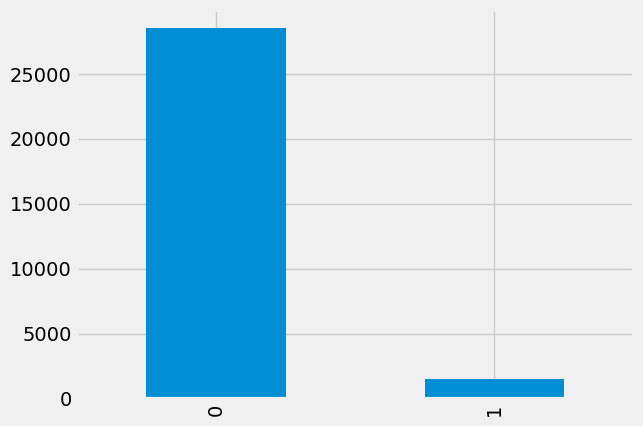

In [9]:
df_HVC.Churn.value_counts().plot(kind='bar')

In [10]:
df_HVC.Churn.value_counts(normalize=True)*100

0    94.959187
1     5.040813
Name: Churn, dtype: float64

<h3><font color=red>OBSERVATIONS</font></h3>

&#9658; Churn distribution is unbalanced <br><br>
&#9658; Need to follow appropirate sampling strategy for train & test split <br><br>
&#9658; Sensitivity will be appropirate measure for this unbalaced classification problem <br><br>

# 2. Data Quality Check

In [11]:
missing_smmry = pd.DataFrame(df.isnull().sum()/df.shape[0]*100,columns=['Missing_Percentage']).reset_index().rename(columns={'index':'field_name'})

In [12]:
missing_smmry[missing_smmry['Missing_Percentage']>5].sort_values('Missing_Percentage',ascending=False)

field_name  Missing_Percentage
193                 arpu_2g_6           74.846748
165           max_rech_data_6           74.846748
157  date_of_last_rech_data_6           74.846748
217                 fb_user_6           74.846748
169           count_rech_2g_6           74.846748
..                        ...                 ...
75               spl_og_mou_8            5.378054
71               isd_og_mou_8            5.378054
115          std_ic_t2o_mou_8            5.378054
63           std_og_t2c_mou_8            5.378054
15                onnet_mou_8            5.378054

[98 rows x 2 columns]

In [13]:
df_missing_smmry_gt_5pct = missing_smmry[missing_smmry['Missing_Percentage']>5].sort_values('Missing_Percentage',ascending=False)

In [14]:
missing_val_cols = df_missing_smmry_gt_5pct['field_name'].to_list()


GridSpec(6, 6)

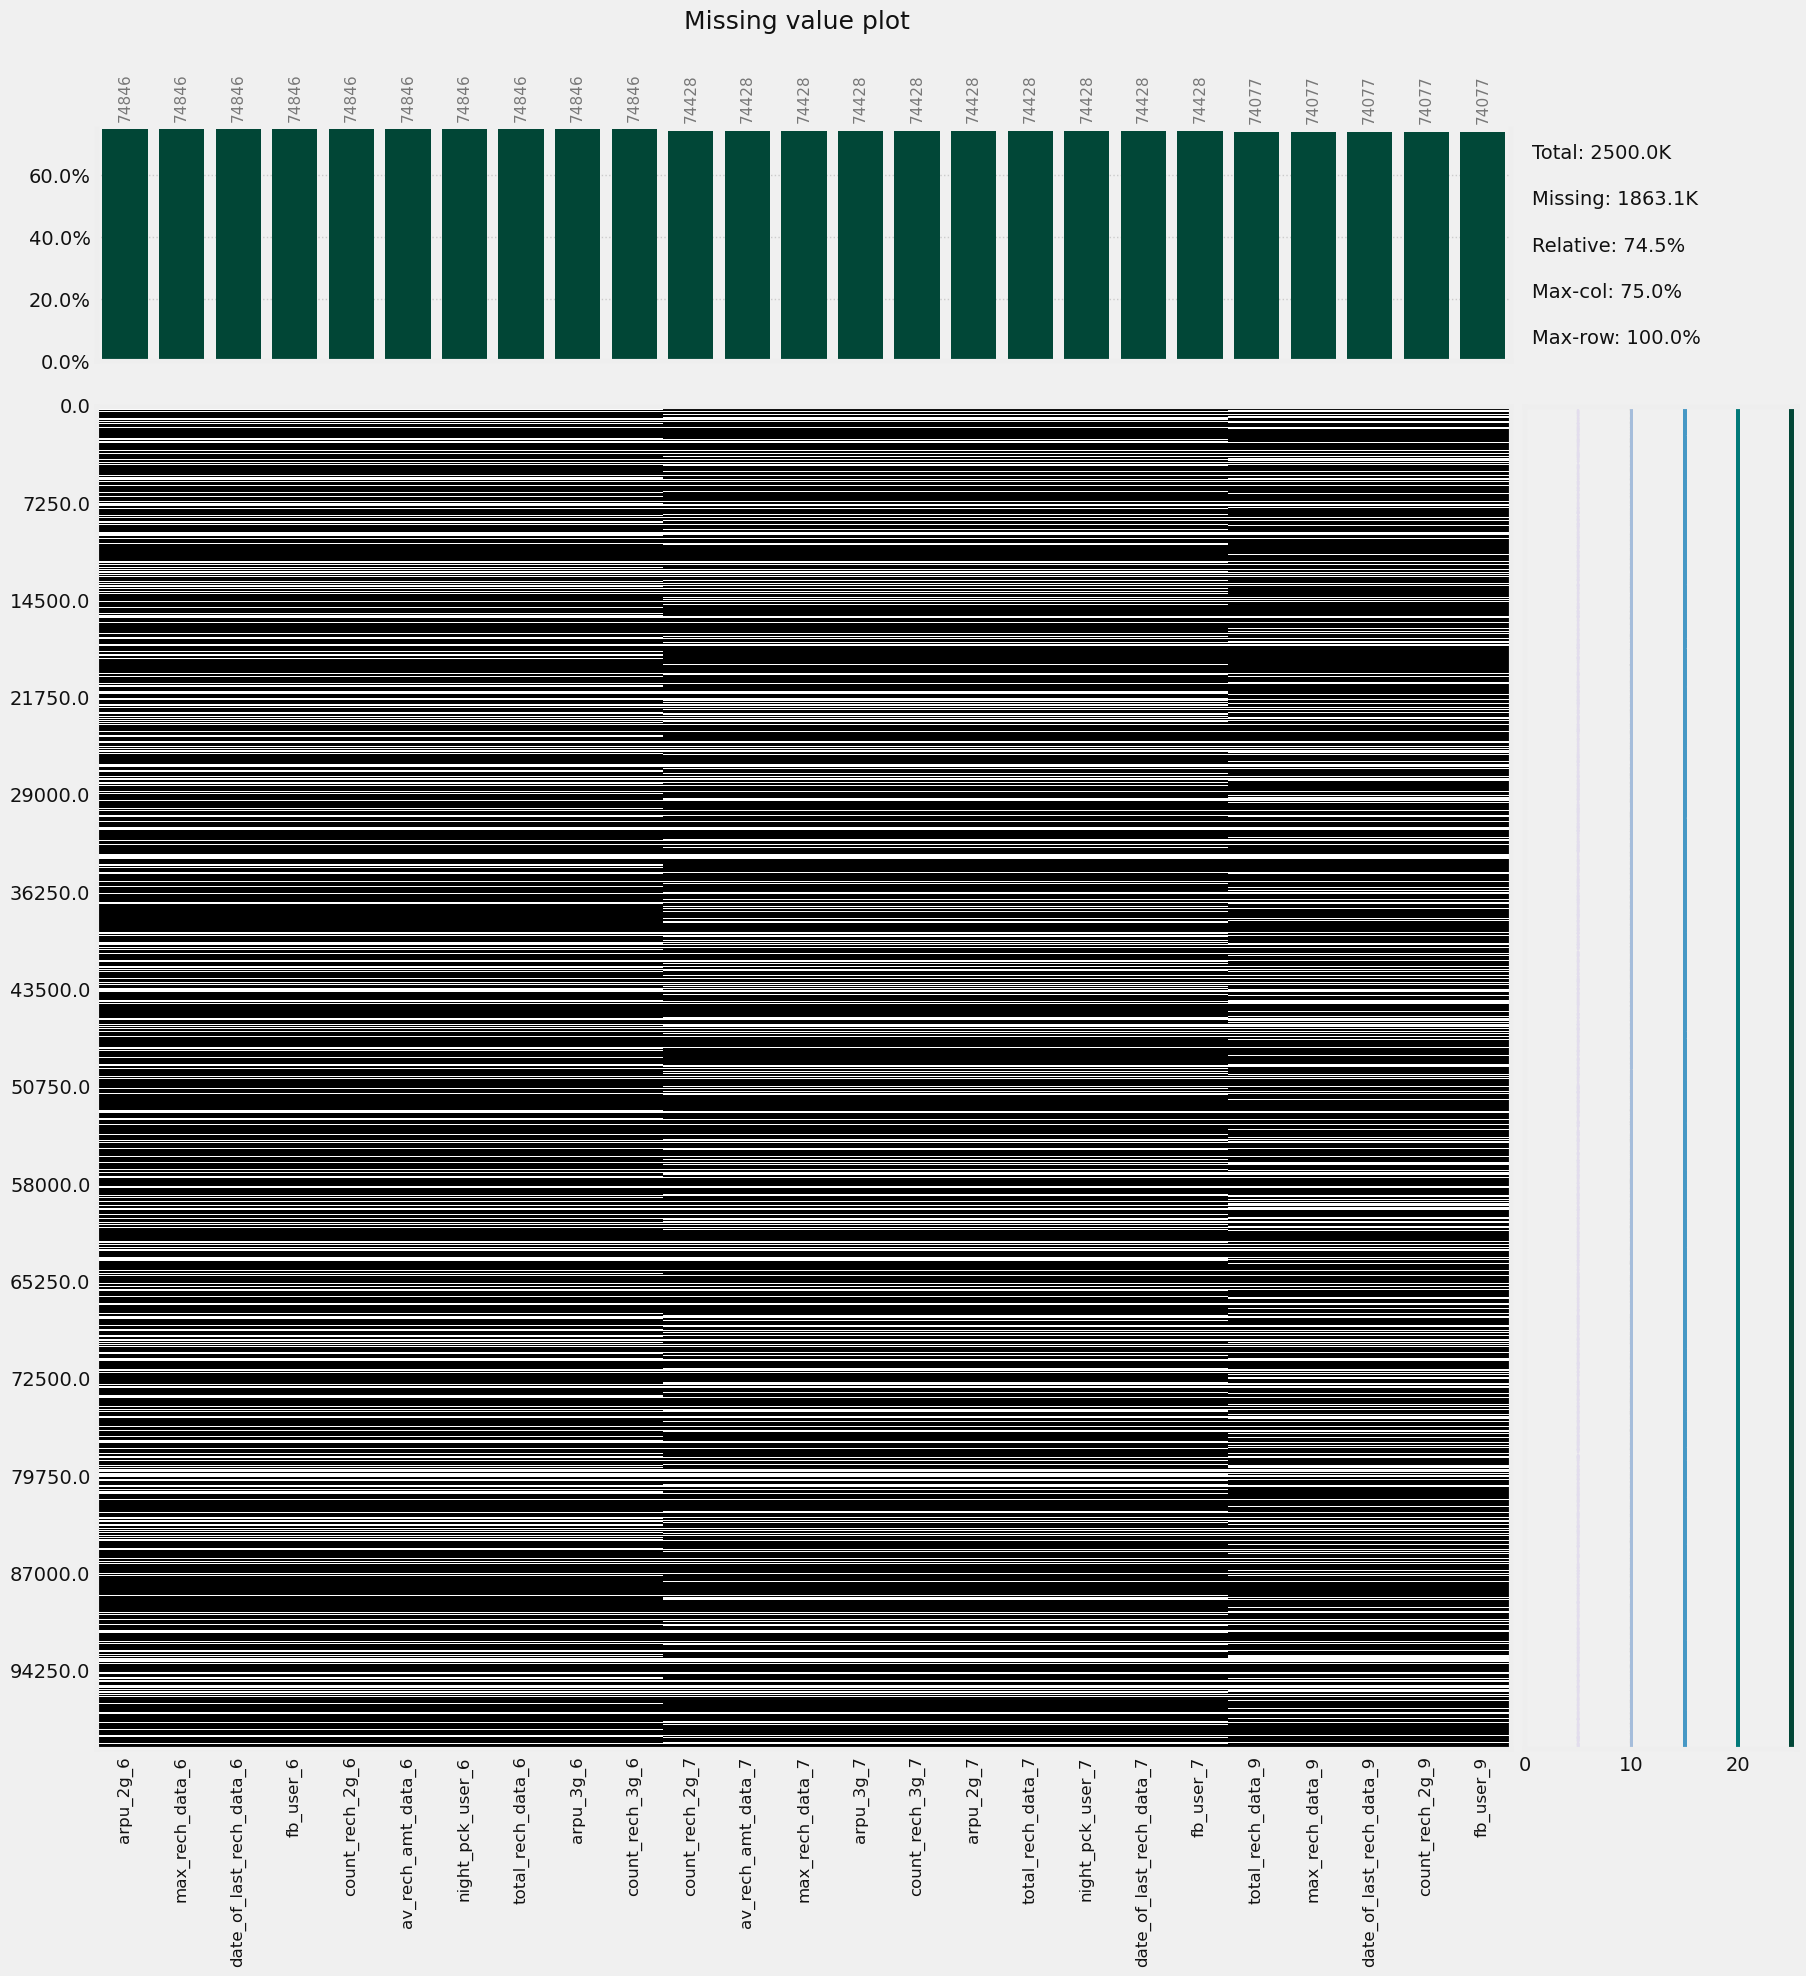

In [15]:
klib.missingval_plot(df[missing_val_cols].iloc[:,:25])

GridSpec(6, 6)

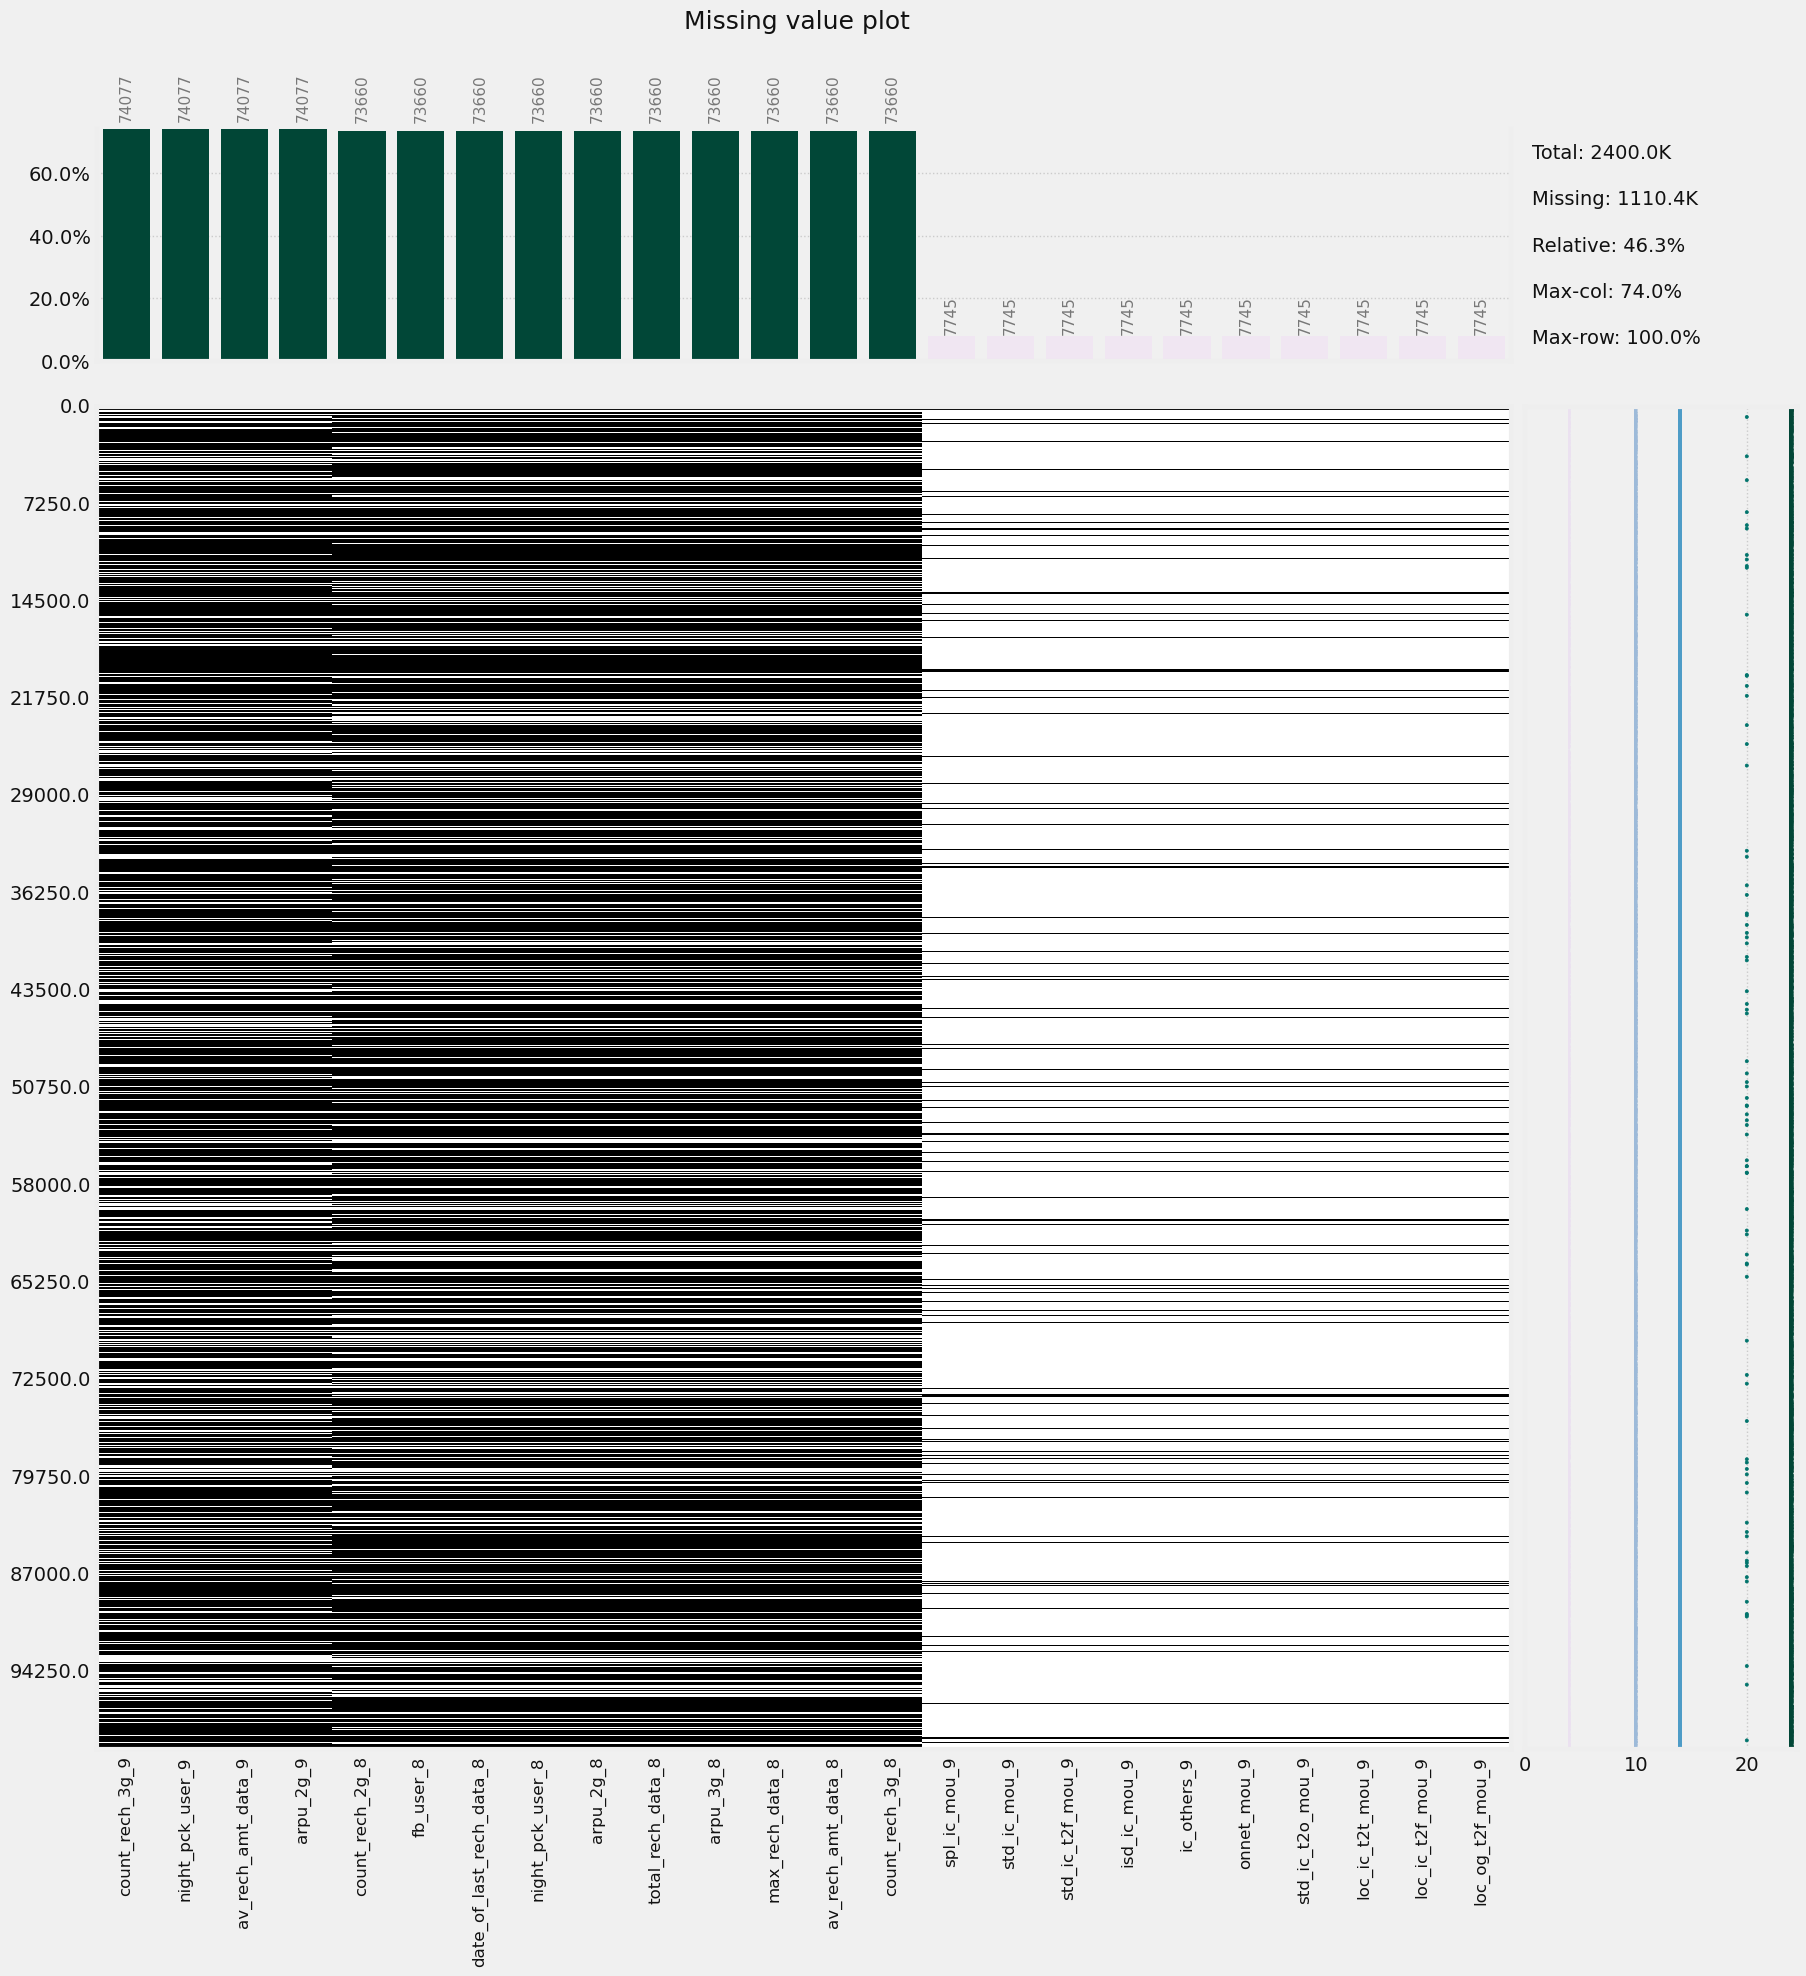

In [16]:
klib.missingval_plot(df[missing_val_cols].iloc[:,26:50])

GridSpec(6, 6)

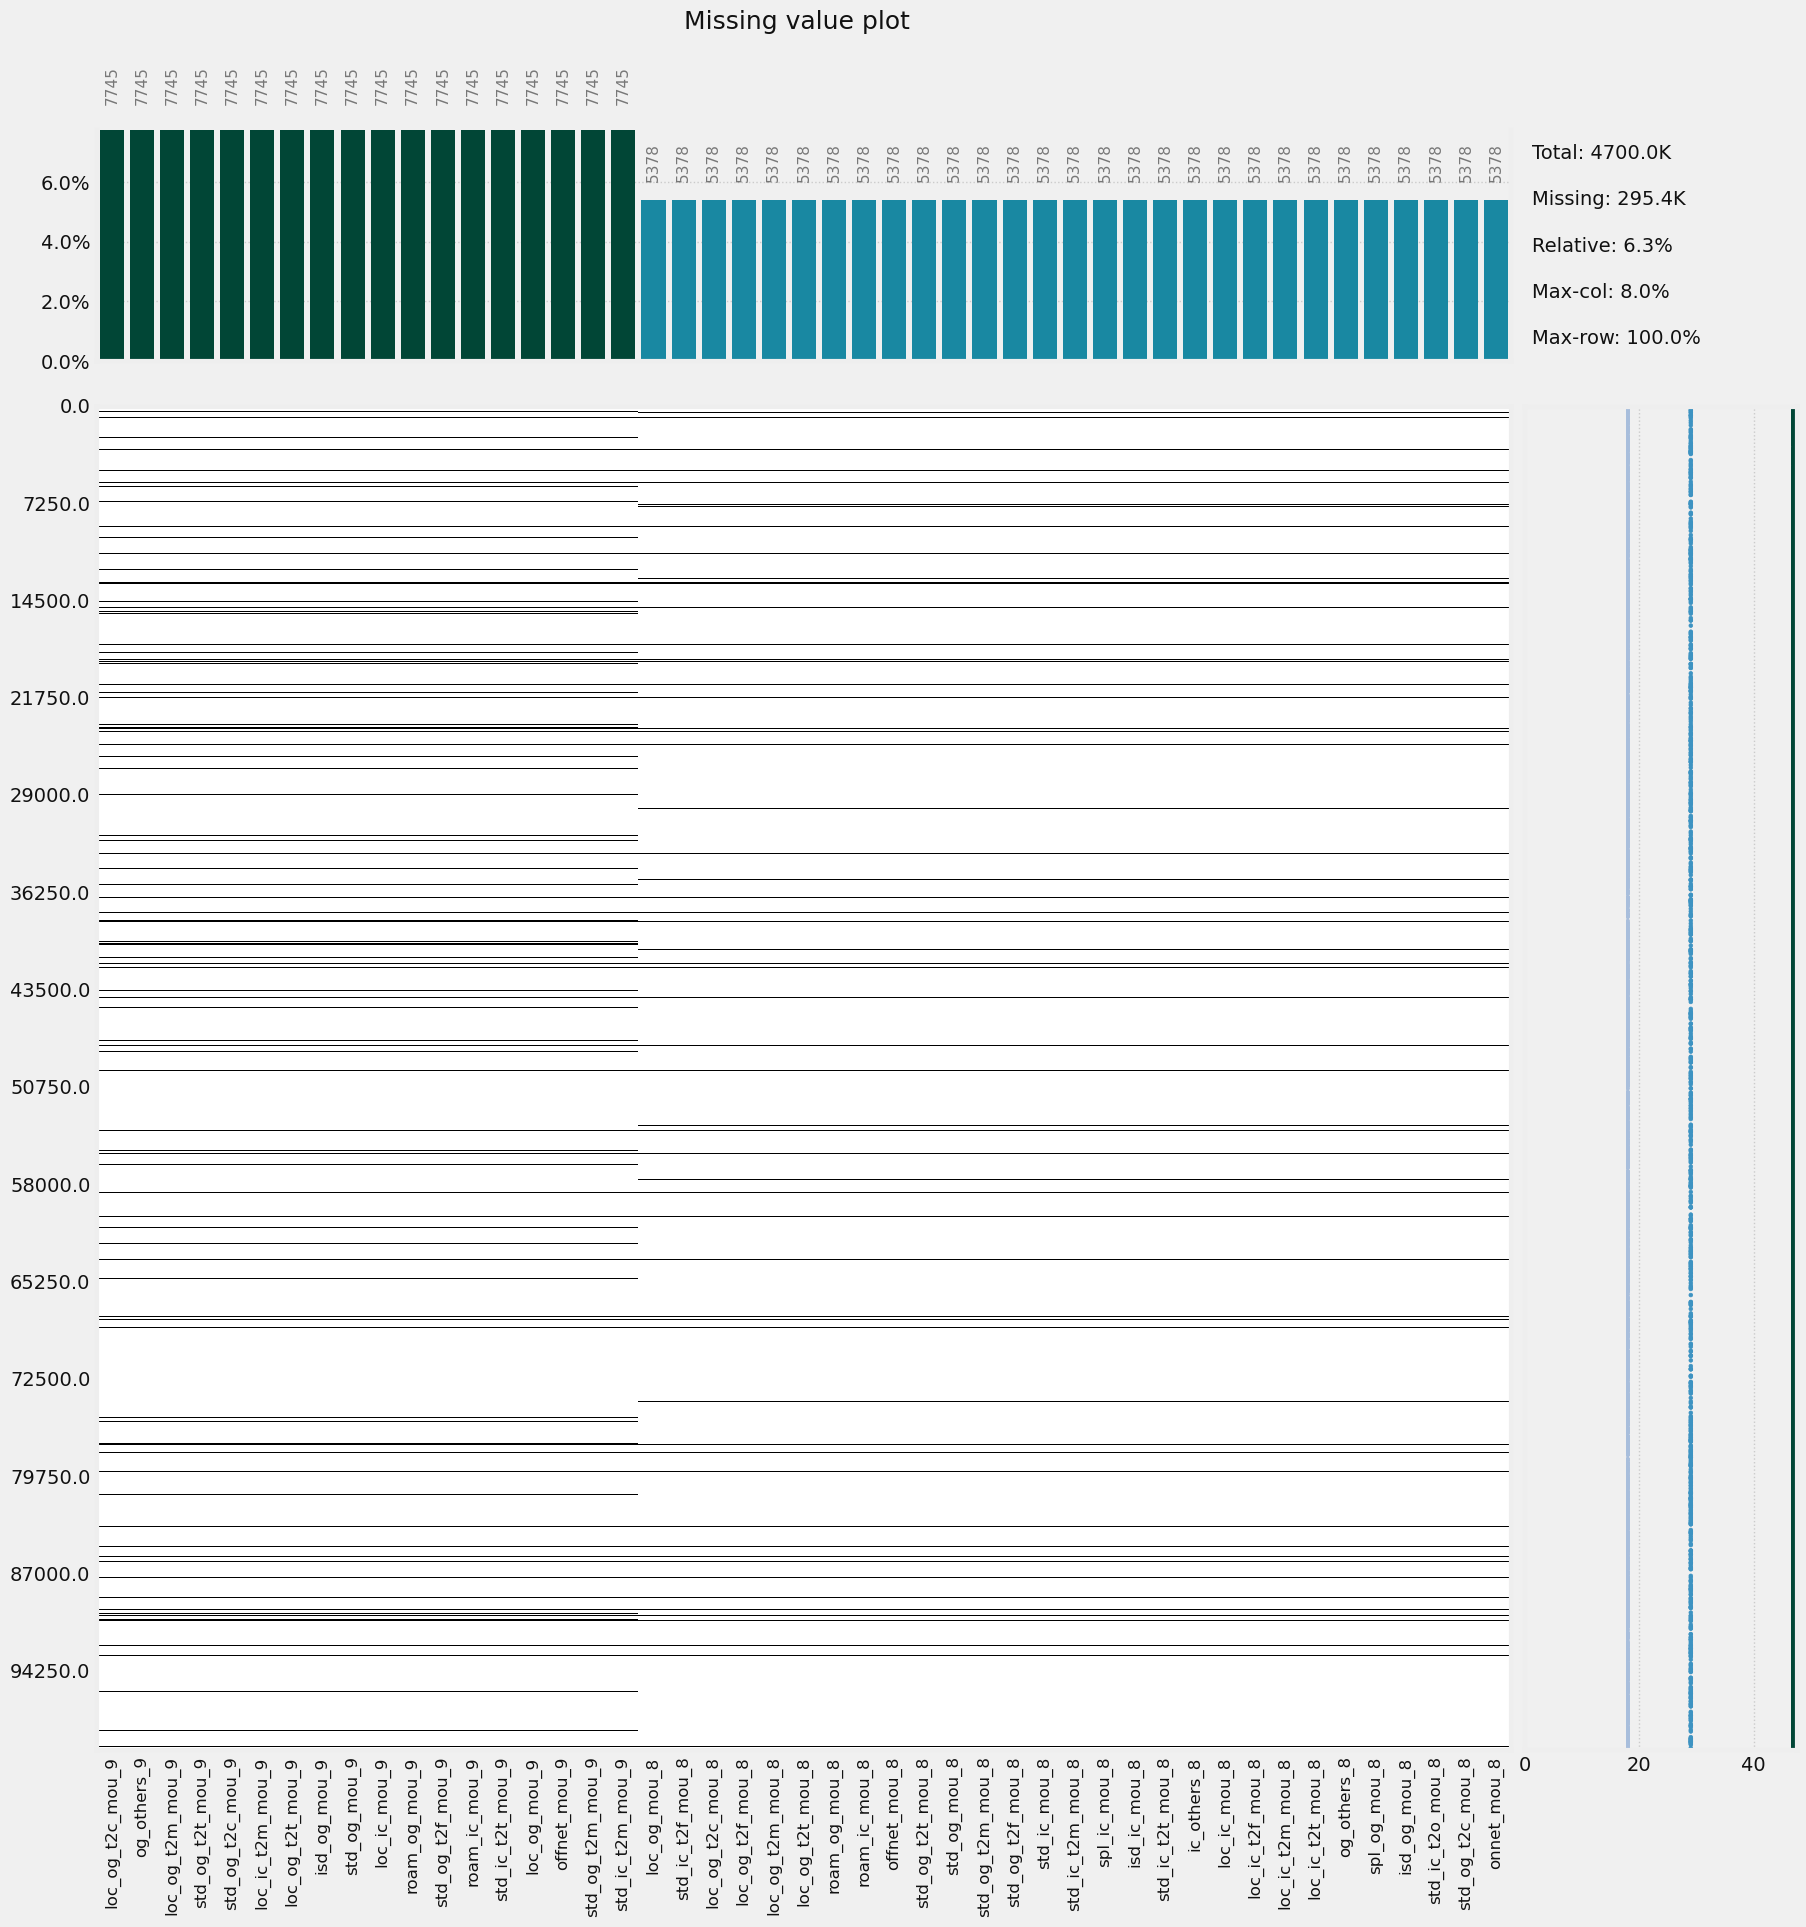

In [17]:
klib.missingval_plot(df[missing_val_cols].iloc[:,51:98])

In [18]:
df.select_dtypes('float').describe()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6  \
count         98981.0         98981.0         98981.0  99999.000000   
mean              0.0             0.0             0.0    282.987358   
std               0.0             0.0             0.0    328.439770   
min               0.0             0.0             0.0  -2258.709000   
25%               0.0             0.0             0.0     93.411500   
50%               0.0             0.0             0.0    197.704000   
75%               0.0             0.0             0.0    371.060000   
max               0.0             0.0             0.0  27731.088000   

             arpu_7        arpu_8        arpu_9   onnet_mou_6   onnet_mou_7  \
count  99999.000000  99999.000000  99999.000000  96062.000000  96140.000000   
mean     278.536648    279.154731    261.645069    132.395875    133.670805   
std      338.156291    344.474791    341.998630    297.207406    308.794148   
min    -2014.045000   -945.808000  -1899.505000      0.000000      0.000000   
25%       86.980500     84.126000     62.685000      7.380000      6.660000   
50%      191.640000    192.080000    176.849000     34.310000     32.330000   
75%      365.344500    369.370500    353.466500    118.740000    115.595000   
max    35145.834000  33543.624000  38805.617000   7376.710000   8157.780000   

        onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  94621.000000  92254.000000  96062.000000  96140.000000  94621.000000   
mean     133.018098    130.302327    197.935577    197.045133    196.574803   
std      308.951589    308.477668    316.851613    325.862803    327.170662   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.460000      5.330000     34.730000     32.190000     31.630000   
50%       32.360000     29.840000     96.310000     91.735000     92.140000   
75%      115.860000    112.130000    231.860000    226.815000    228.260000   
max    10752.560000  10427.460000   8362.360000   9667.130000  14007.340000   

       offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count  92254.000000   96062.000000   96140.000000   94621.000000   
mean     190.337222       9.950013       7.149898       7.292981   
std      319.396092      72.825411      73.447948      68.402466   
min        0.000000       0.000000       0.000000       0.000000   
25%       27.130000       0.000000       0.000000       0.000000   
50%       87.290000       0.000000       0.000000       0.000000   
75%      220.505000       0.000000       0.000000       0.000000   
max    10310.760000   13724.380000   15371.040000   13095.360000   

       roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count   92254.000000   96062.000000   96140.000000   94621.000000   
mean        6.343841      13.911337       9.818732       9.971890   
std        57.137537      71.443196      58.455762      64.713221   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      8464.030000    3775.110000    2812.040000    5337.040000   

       roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   92254.000000      96062.000000      96140.000000      94621.000000   
mean        8.555519         47.100763         46.473010         45.887806   
std        58.438186        150.856393        155.318705        151.184830   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          1.660000          1.630000          1.600000   
50%         0.000000         11.910000         11.610000         11.730000   
75%         0.000000         40.960000         39.910000         40.110000   
max      4428.460000       6431.330000       7400.660000      10752.560000   

     

In [19]:

def dist_box_plot(df, cols):
    # Function to plot distribution plots
    def plot_dist(df, col, churn_value, ax, color):
        sns.distplot(df[df['Churn'] == churn_value][col], bins=40, ax=ax, kde=False, color=color, hist_kws={"alpha": 1})
        title = 'Churn' if churn_value == 1 else 'Non-Churn'
        ax.set_title(title, fontweight='bold', size=15)

    # Function to plot box and strip plots
    def plot_box_strip(df, col, ax):
        sns.boxplot(x='Churn', y=col, data=df, ax=ax)
        sns.stripplot(x='Churn', y=col, data=df, jitter=True, edgecolor="gray", ax=ax)
        ax.yaxis.label.set_visible(False)
        ax.set_title(col, fontweight='bold', size=15)

    # Colors for the plots
    churn_color = '#2ca02c'  
    non_churn_color = '#d62728'  

    # Create distribution plots
    for i, col in enumerate(cols):
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
        plot_dist(df, col, 1, axes[0], churn_color)
        plot_dist(df, col, 0, axes[1], non_churn_color)

    # Create box and strip plots
    fig, axes = plt.subplots(nrows=1, ncols=len(cols), figsize=(18, 4))
    for i, col in enumerate(cols):
        plot_box_strip(df, col, axes[i])

    plt.show()

# Usage
#dist_box_plot(dataframe, ['col1', 'col2', 'col3'])


#### arpu (Average Revenue per user)¶

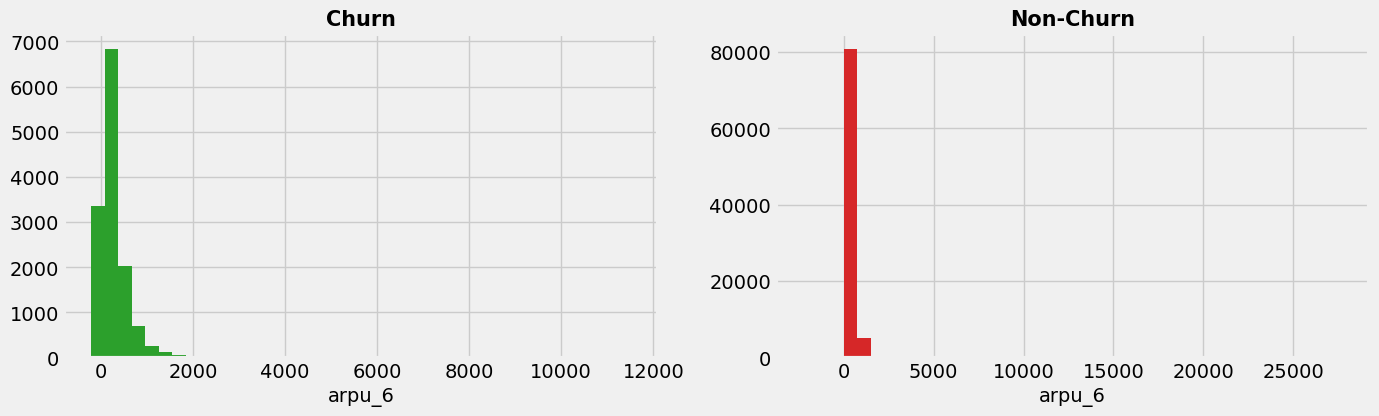

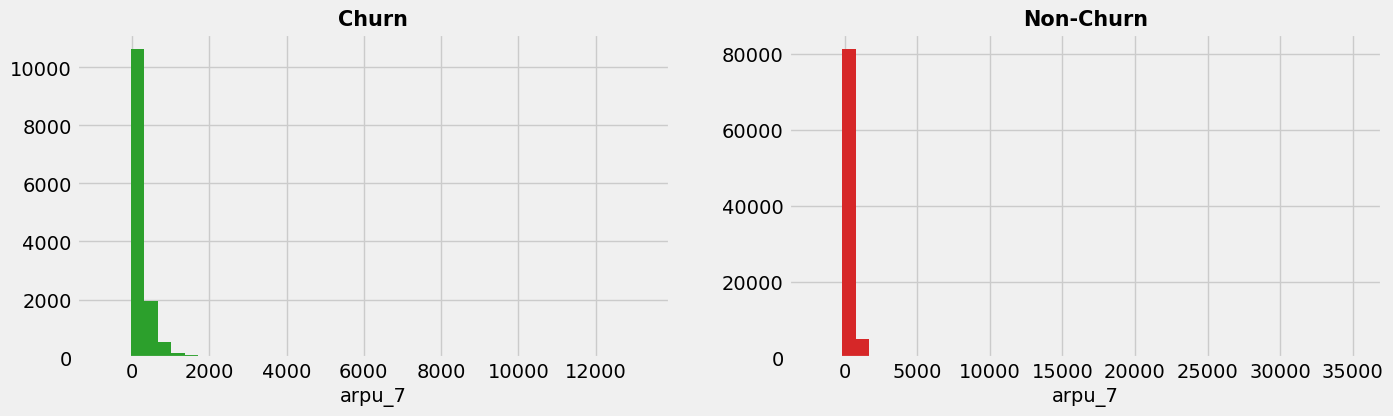

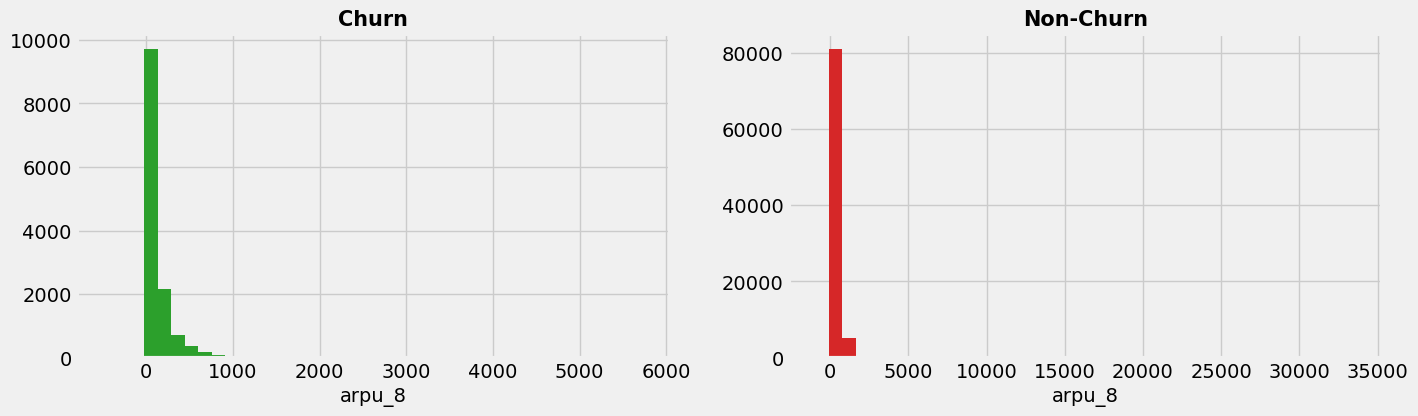

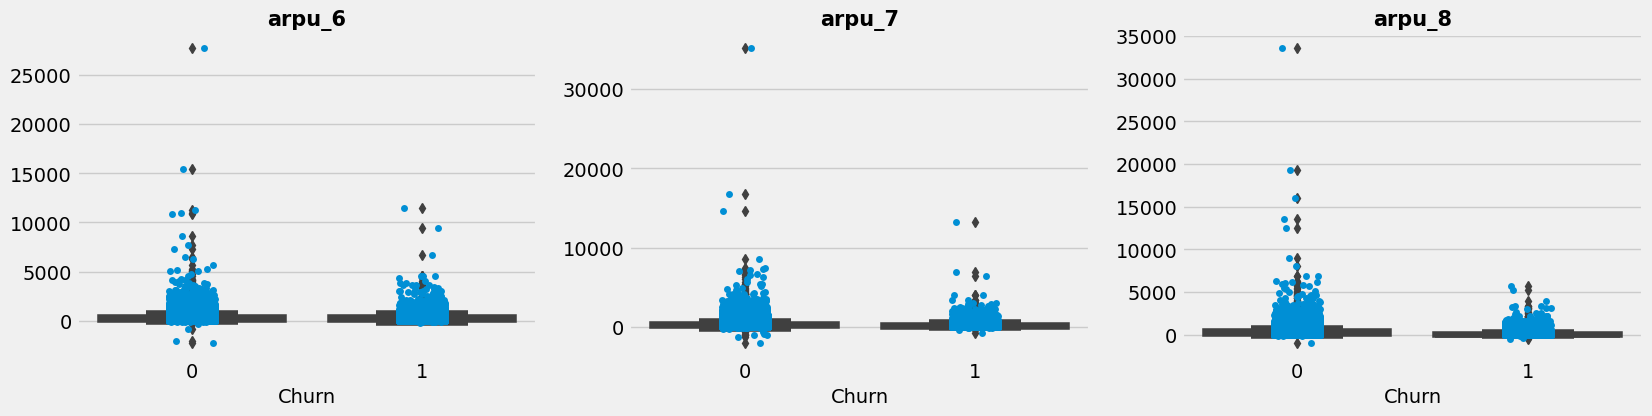

In [20]:
dist_box_plot(df,['arpu_6','arpu_7','arpu_8'])

As we can see average revenue per user is decreasing for churn customers in 8th month.Also there are lots of outlier exists in revenue as some customers might using higher data and recharging frequently.

#### onnnet_mou (Minutes of usage for all kind of calls within the same operator network)

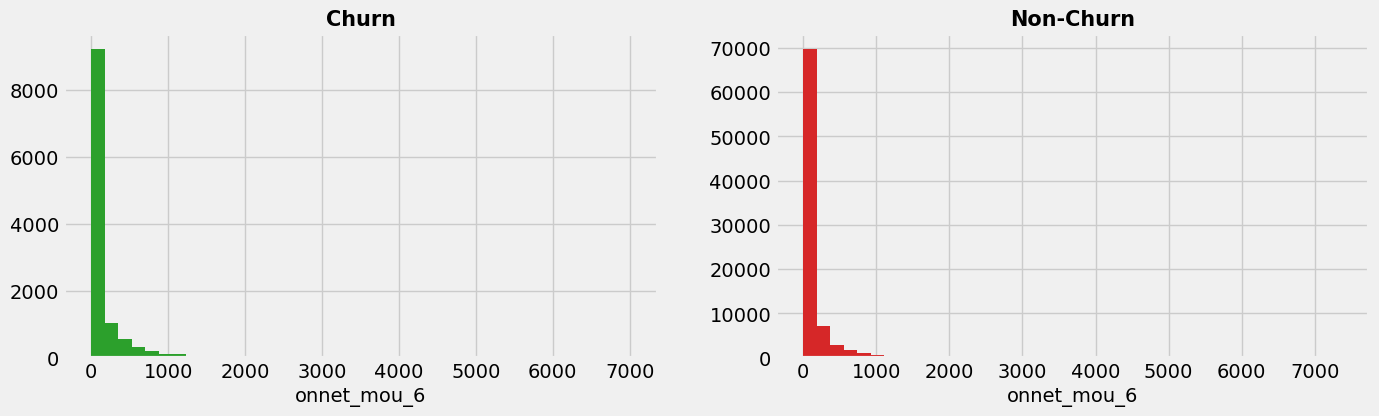

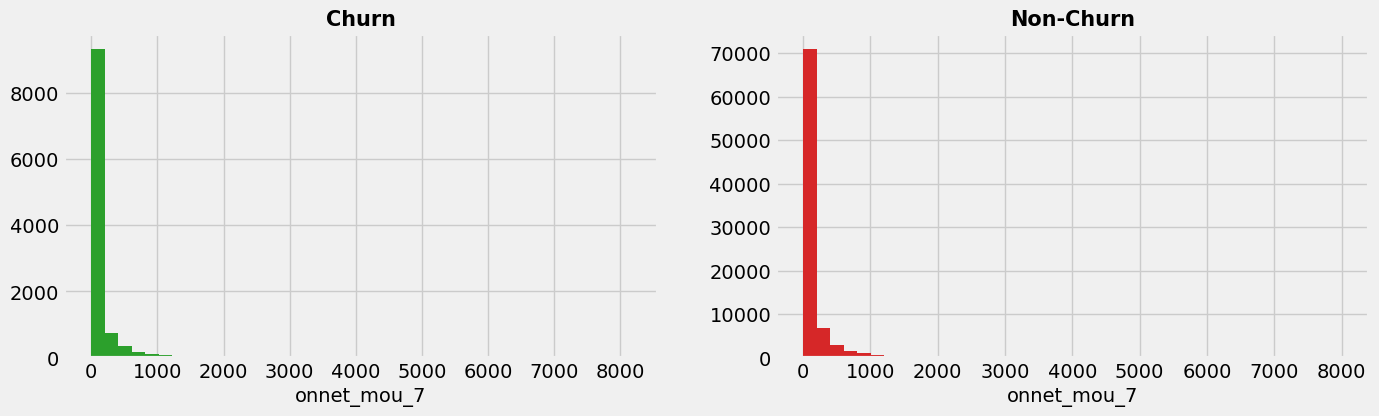

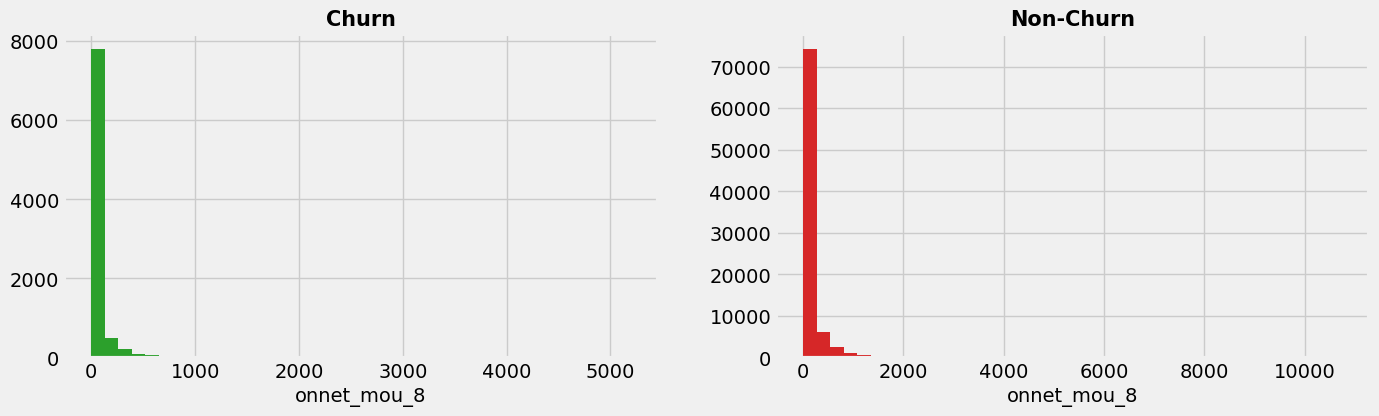

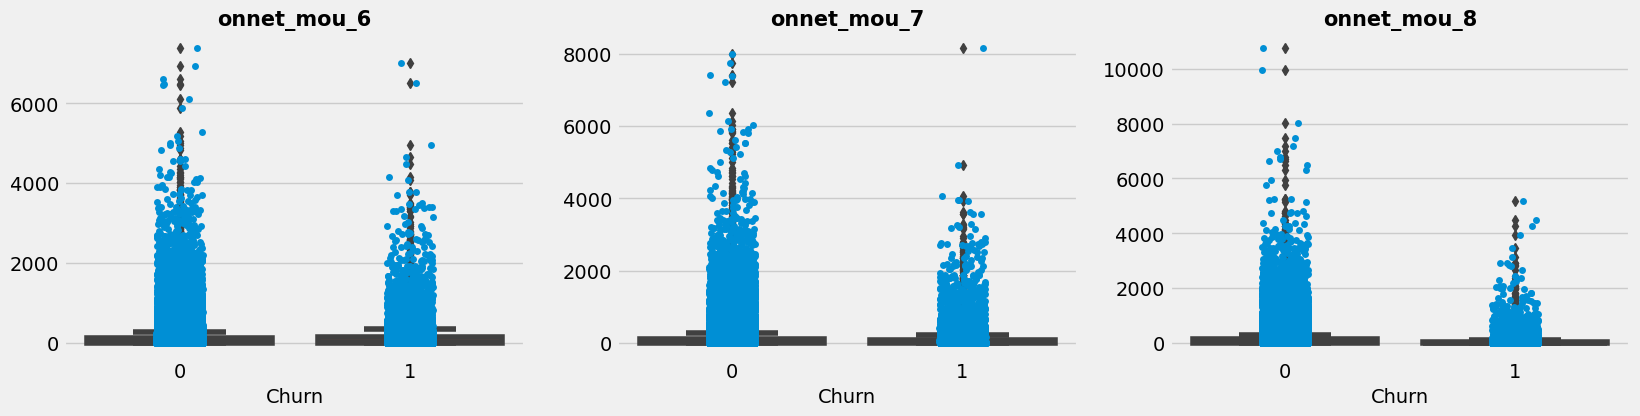

In [21]:

dist_box_plot(df,['onnet_mou_6','onnet_mou_7','onnet_mou_8'])

we can clearly see that Minutes of usage for all kind of calls within the same operator network is decreasing for churn customers.Also it looks like some of the customers are having high minutes of usage( outlier present)

### offnet_mou (Minutes of usage for All kind of calls outside the operator T network)

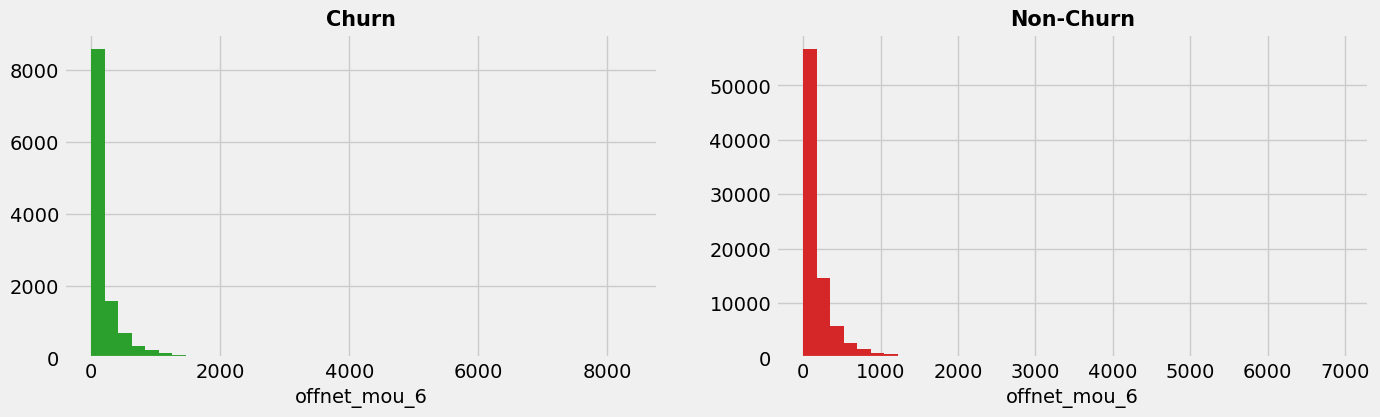

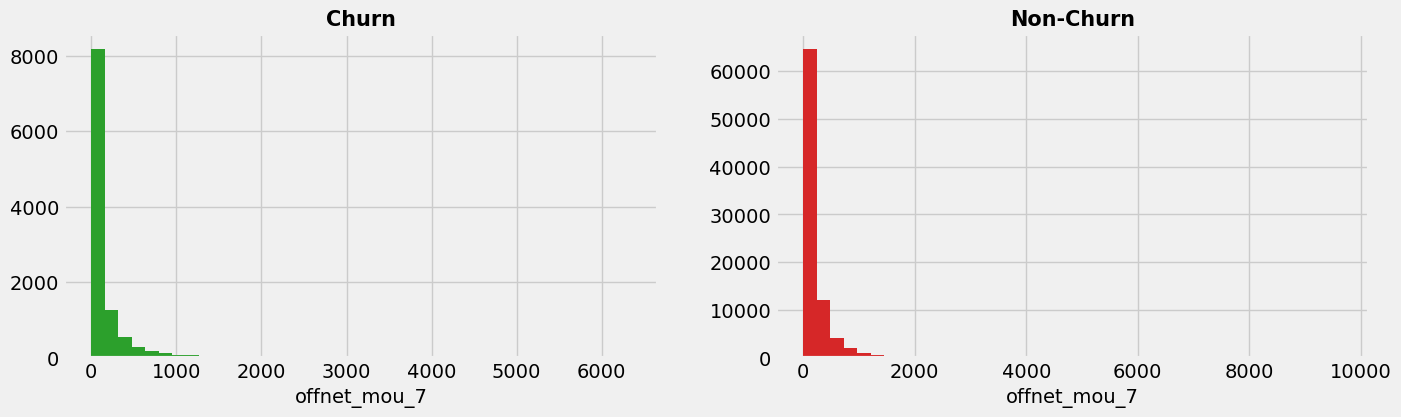

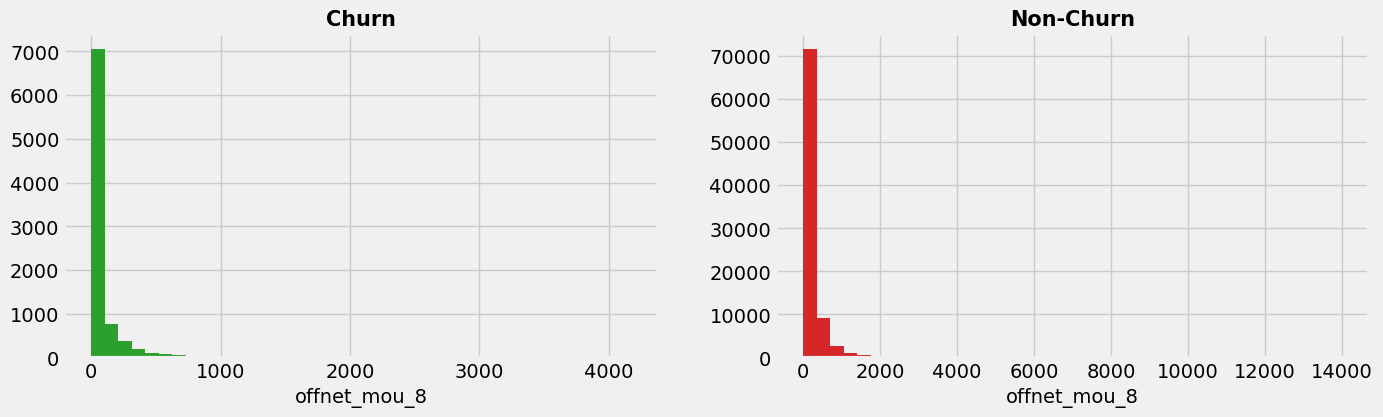

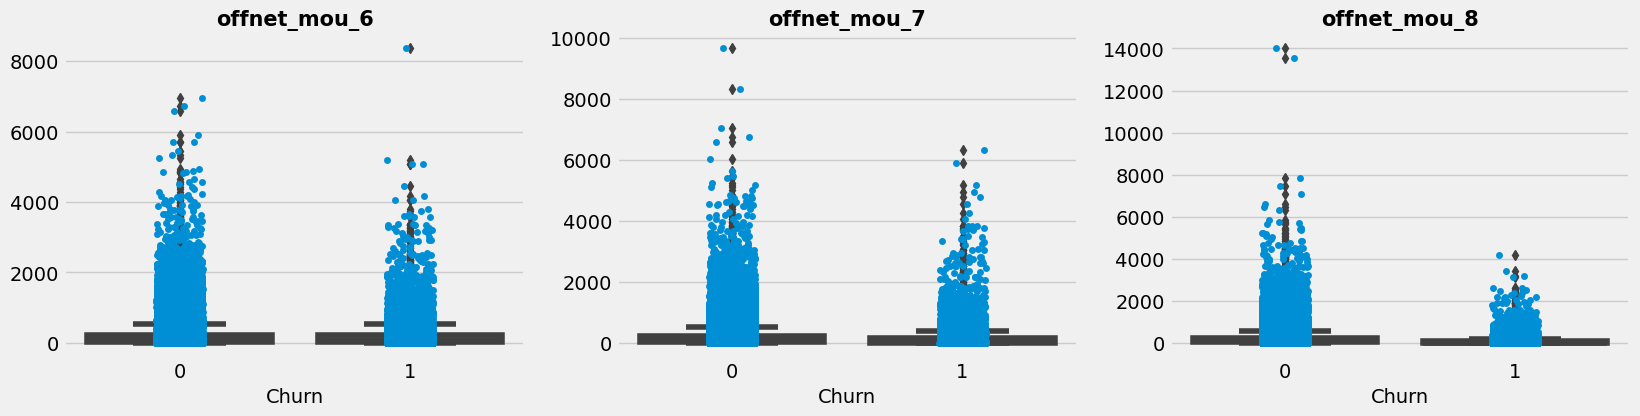

In [22]:
dist_box_plot(df,['offnet_mou_6','offnet_mou_7','offnet_mou_8'])

Similalry Offnet minutes of usage is also decreasing for churn customers in 8th month.As compared to 6th and 7th month , in 8th month there is no high minutes of usage as the gitter graph is condensed.

### roam_ic_mou (Minutes of usage on roaming incoming calls)

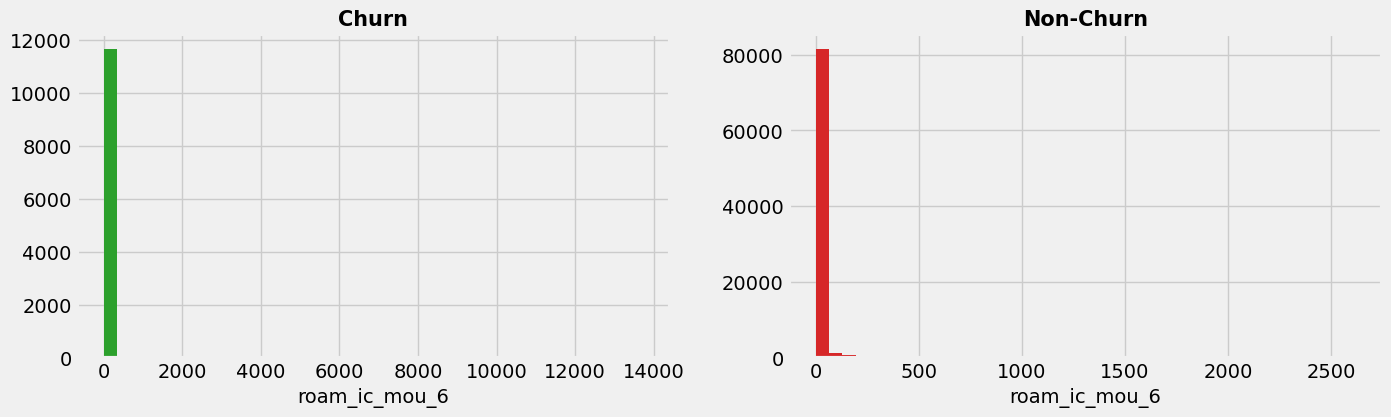

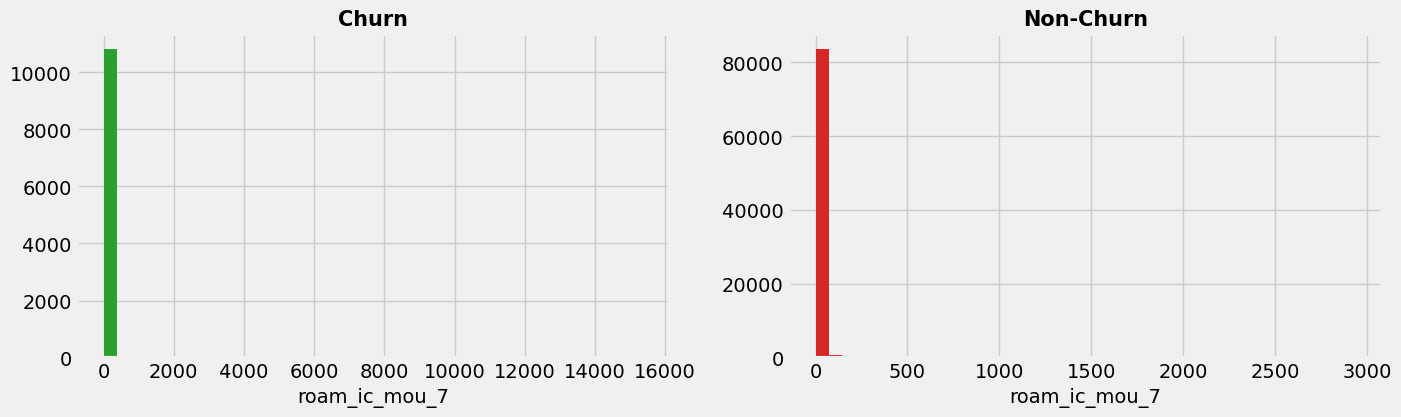

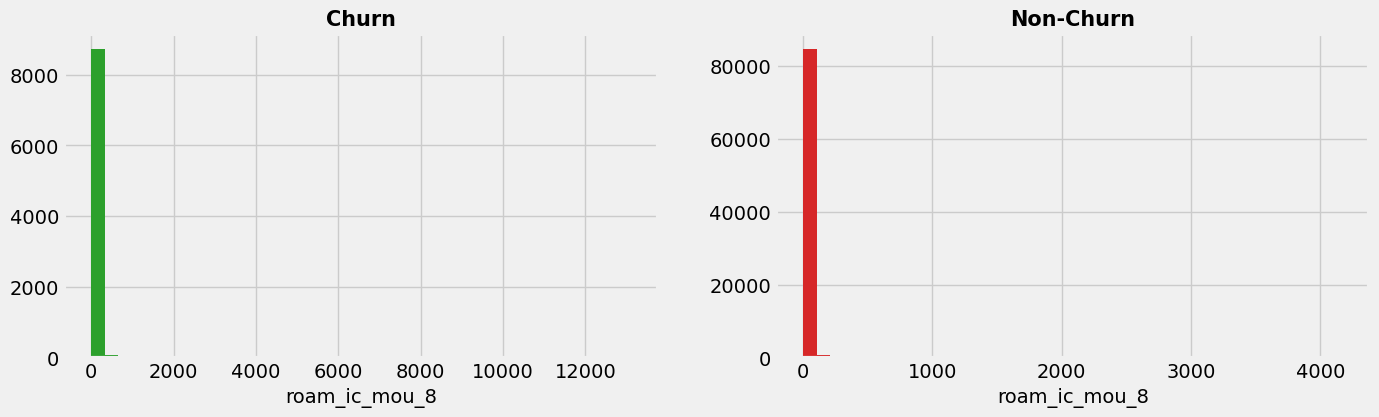

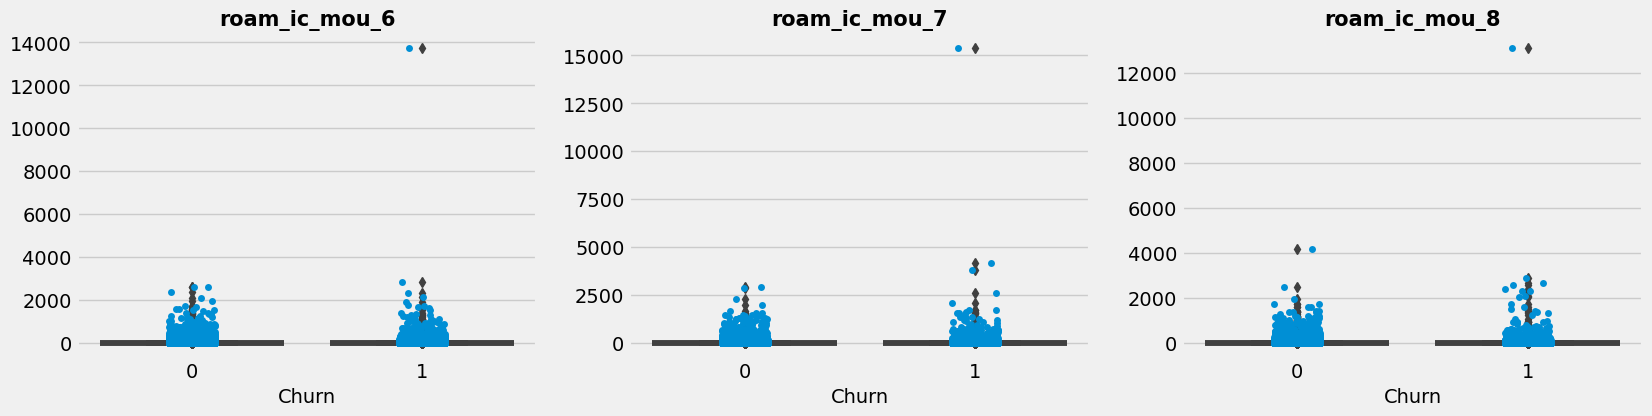

In [23]:
dist_box_plot(df,['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8'])

As compard to other parameters it looks like customers uses less services during roaming. Also gitter graph for 8th month (churn customers) shows slight decrease in mou.

### loc_og_t2t_mou (Minutes of usage within same operator on local outgoing calls)

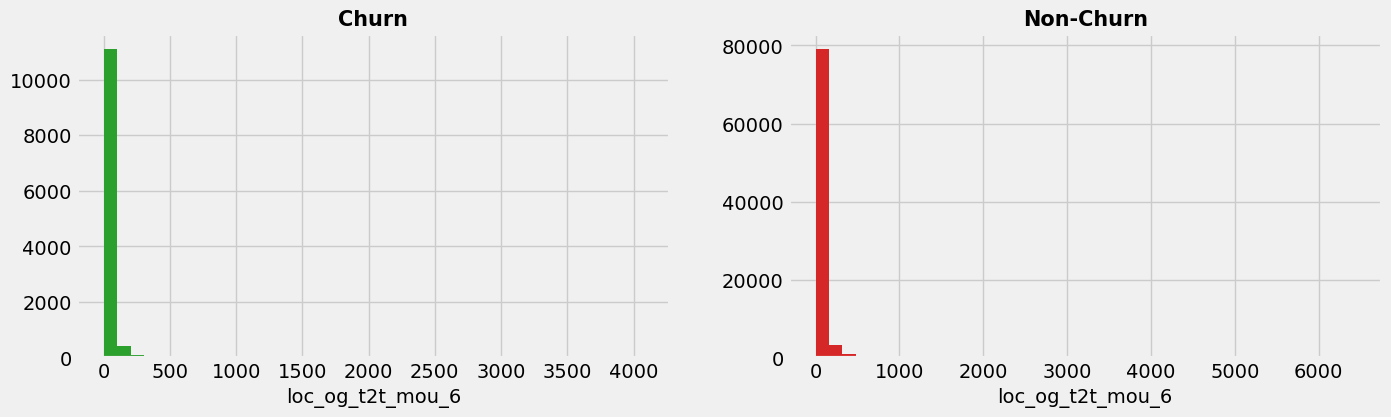

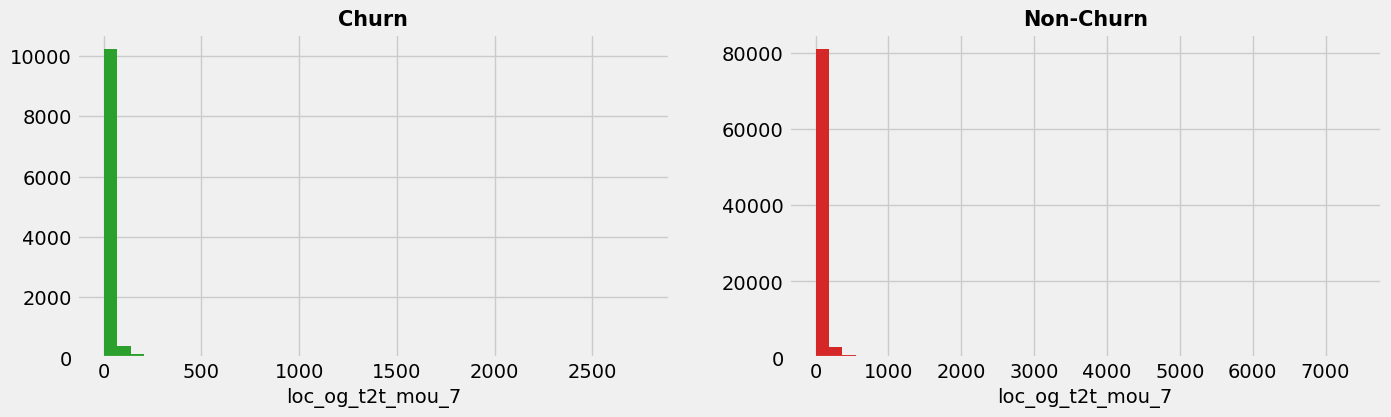

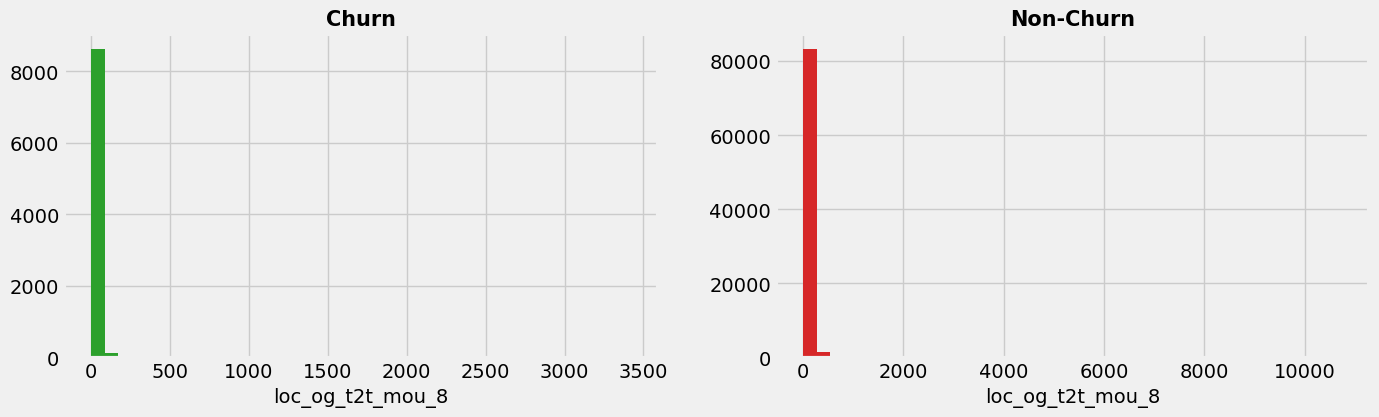

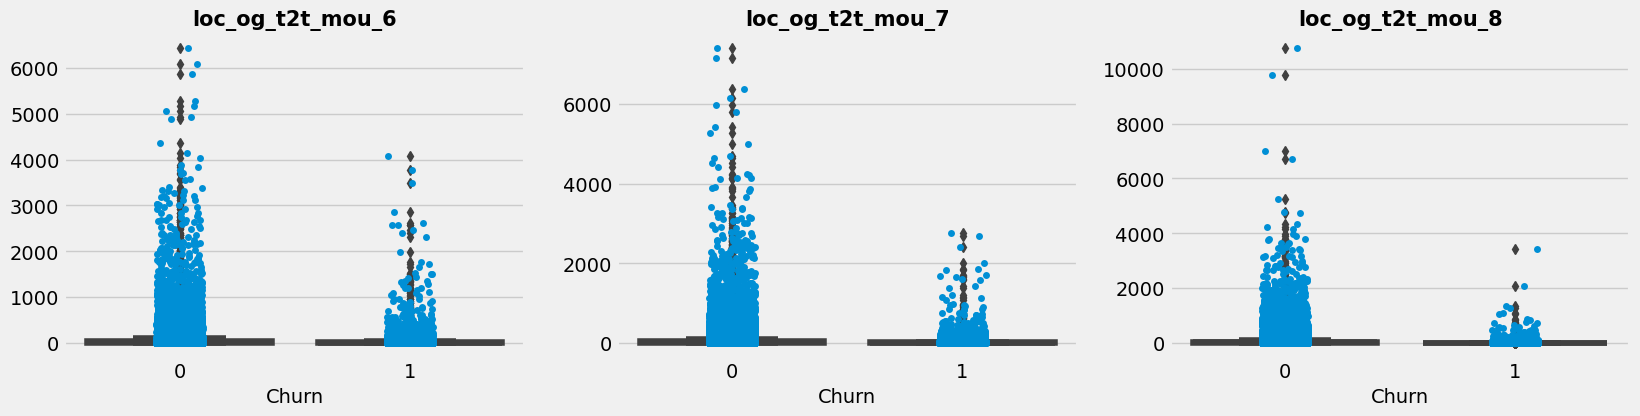

In [24]:
dist_box_plot(df,['loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8'])

local outgoing call with in same operator has decreased in 8th month for churn customers.

### loc_og_t2m_mou (Minutes of usage from operator T to fixed line T on local outgoing calls)

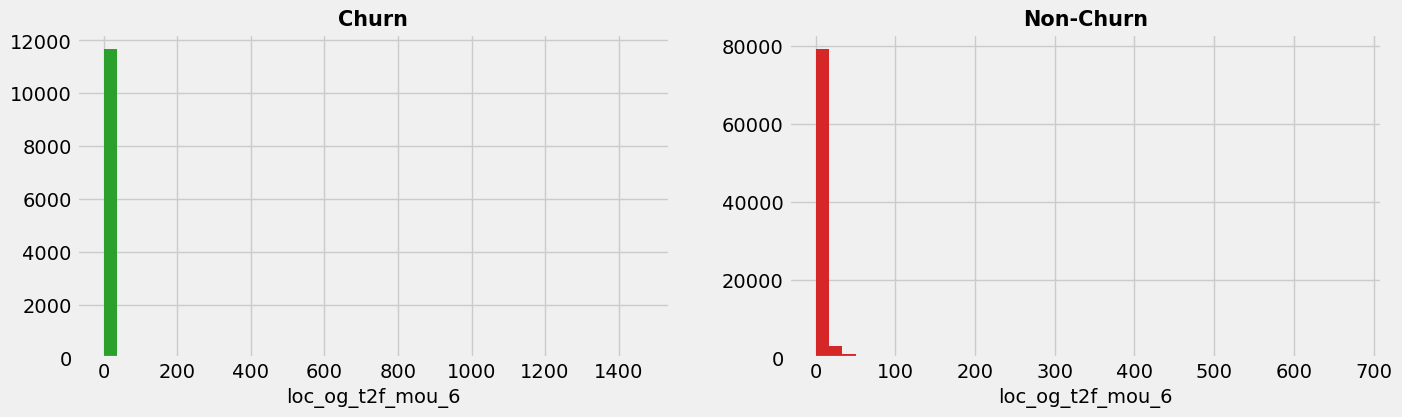

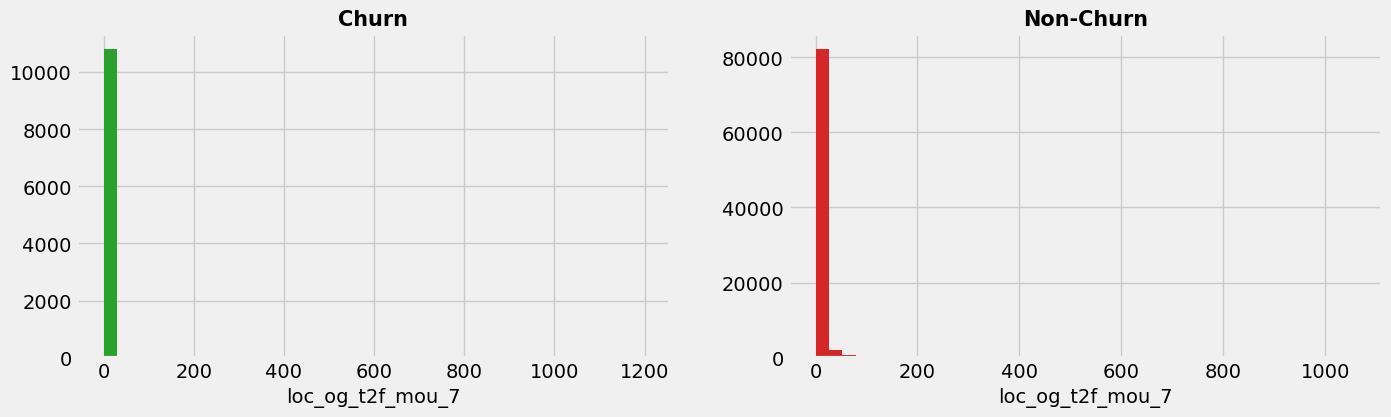

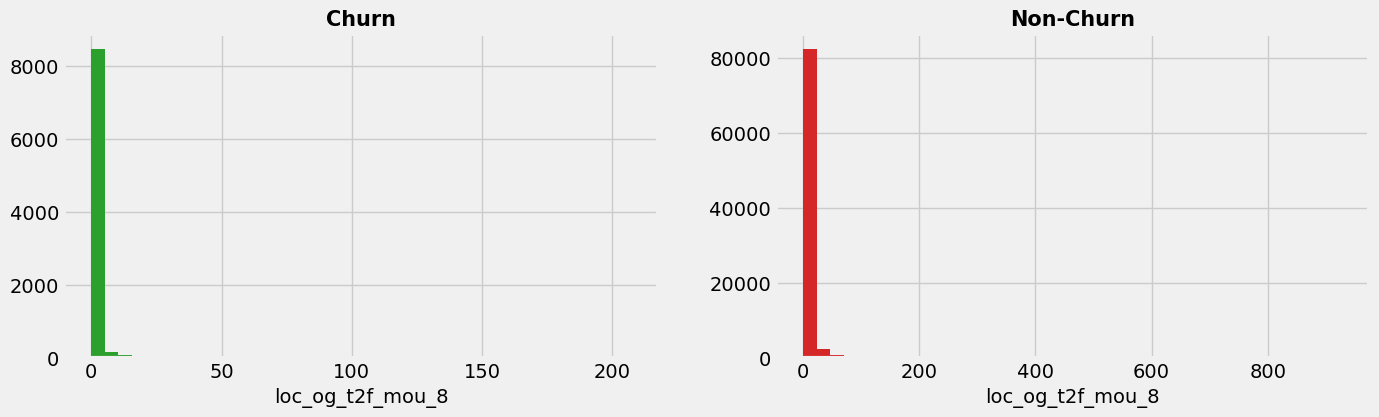

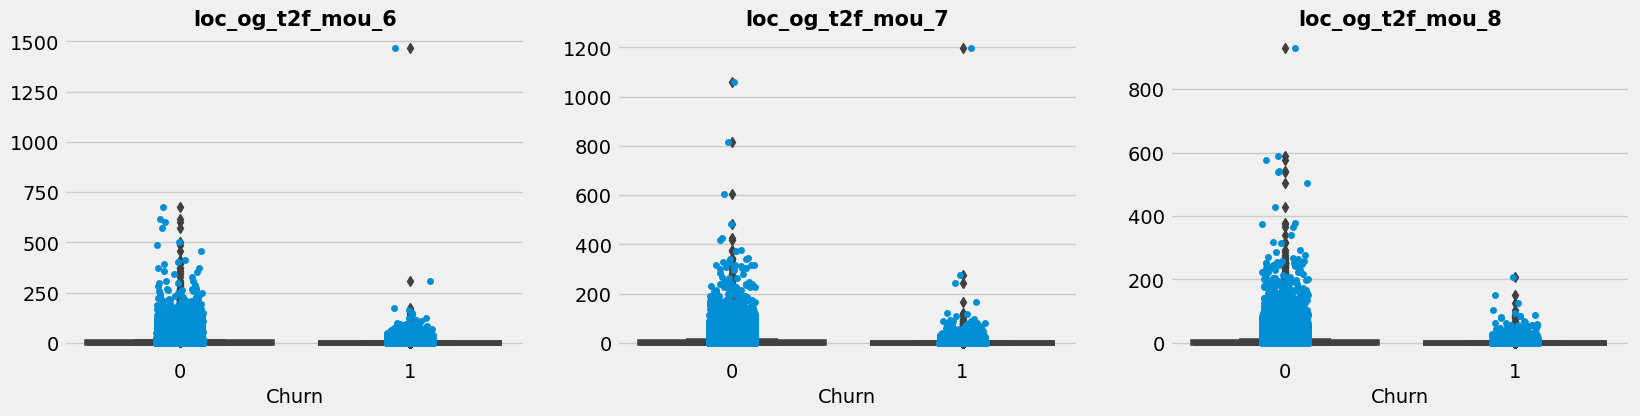

In [25]:
dist_box_plot(df,['loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8'])

#### As we can see clearly very less usage of Minutes of usage from operator T to fixed line T on local outgoing calls, which means customers prefer calling mobile.Also there is no outliers present for 8th month churn customer graph which shows decrease in minutes of usage.

### total_rech_amt (Total Reacharge Amount)

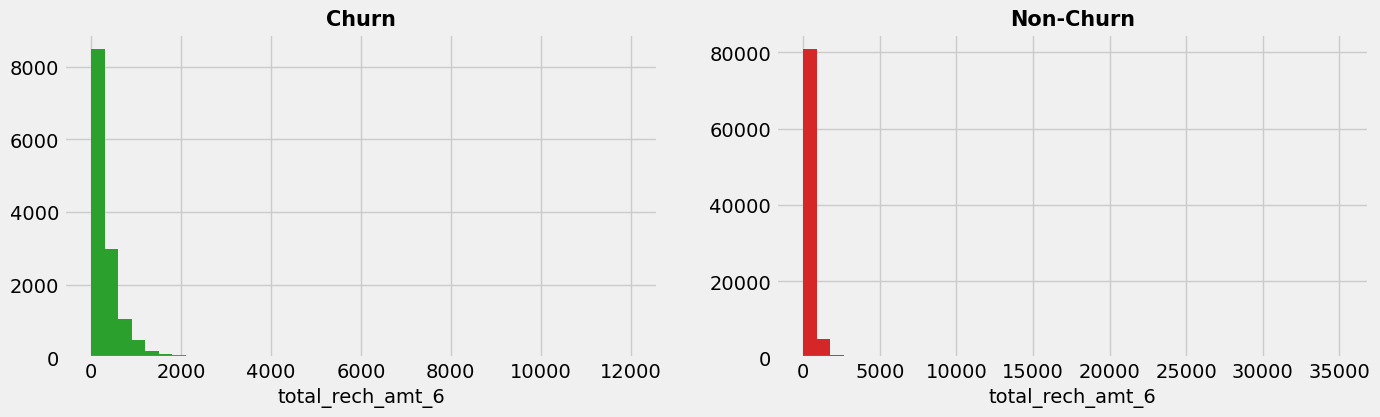

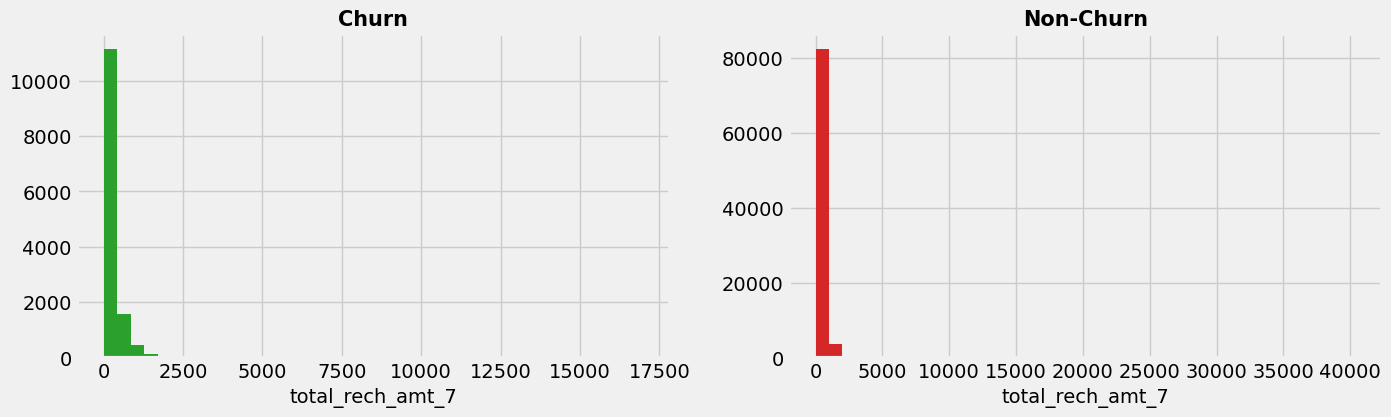

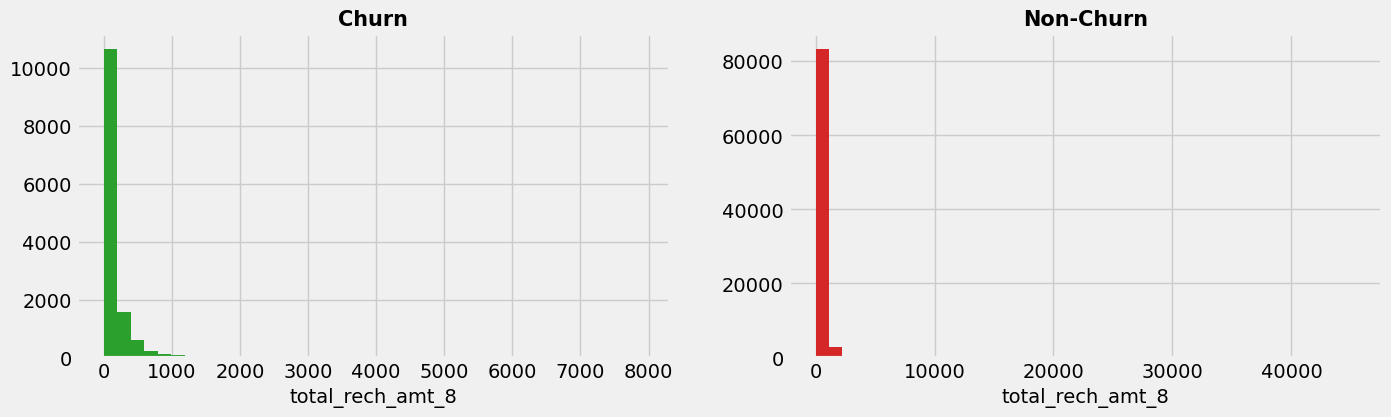

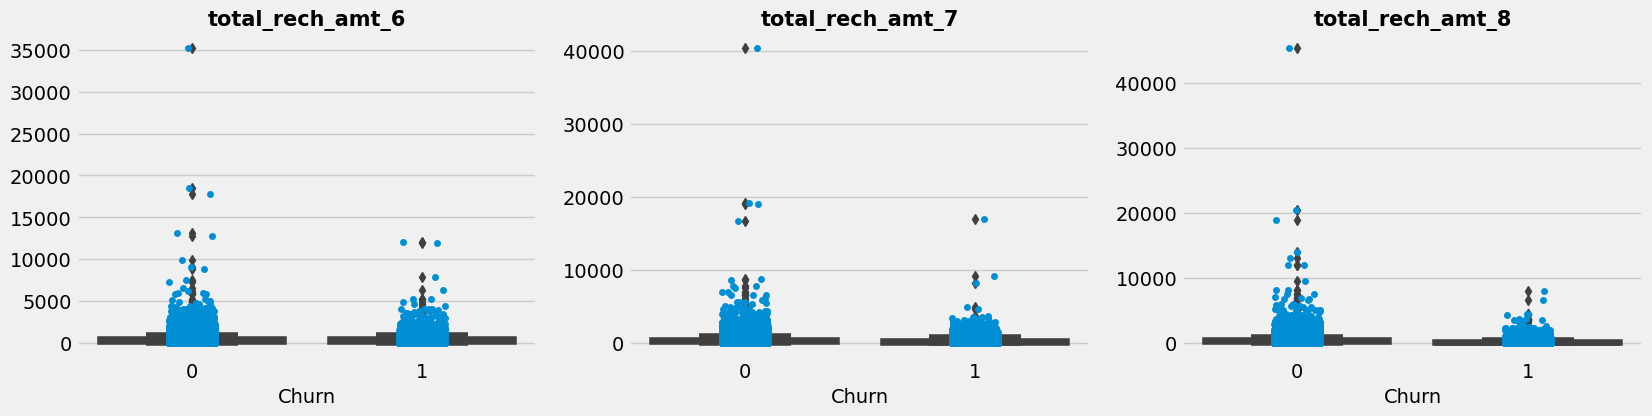

In [26]:
dist_box_plot(df,['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'])

Total recharge amount distribution is getting increased  from 6 to 7th month and then getting decrease in 8th month for Churn customers.

#### max_rech_amt (Max Reacharge Amount)

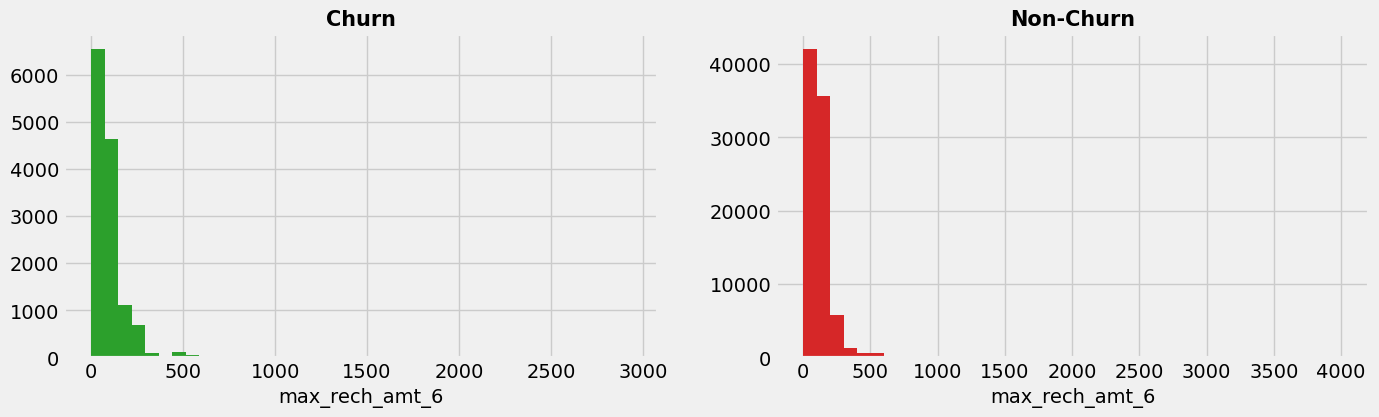

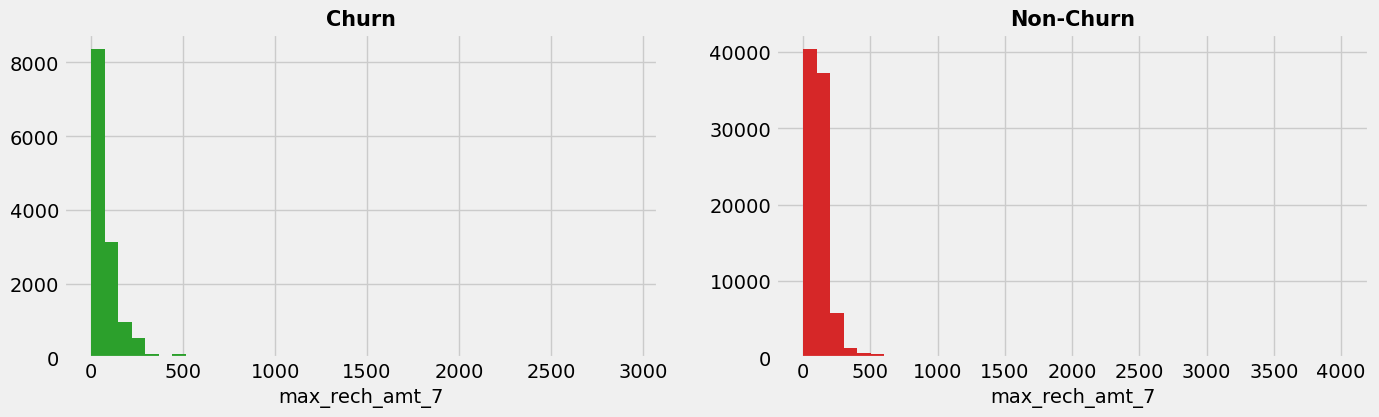

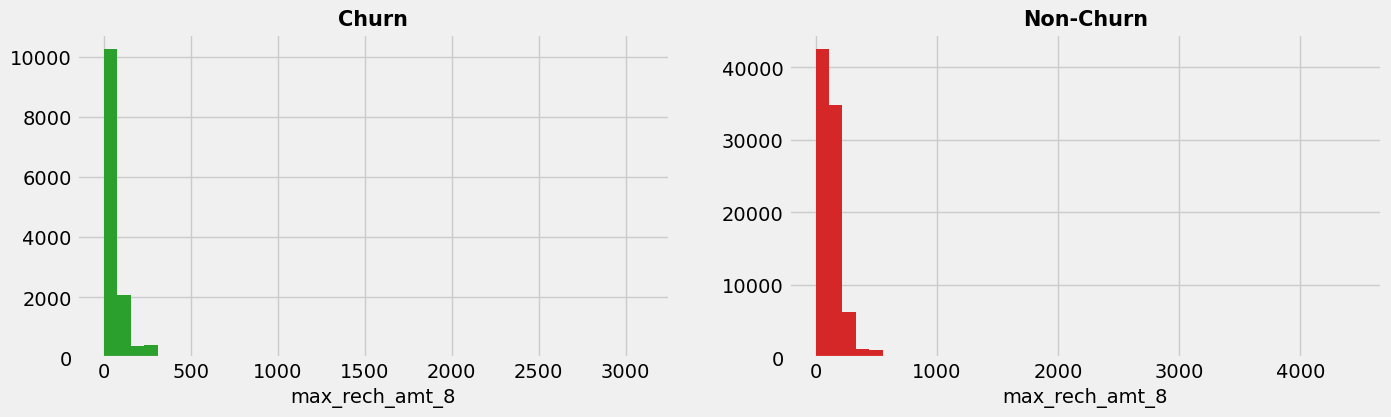

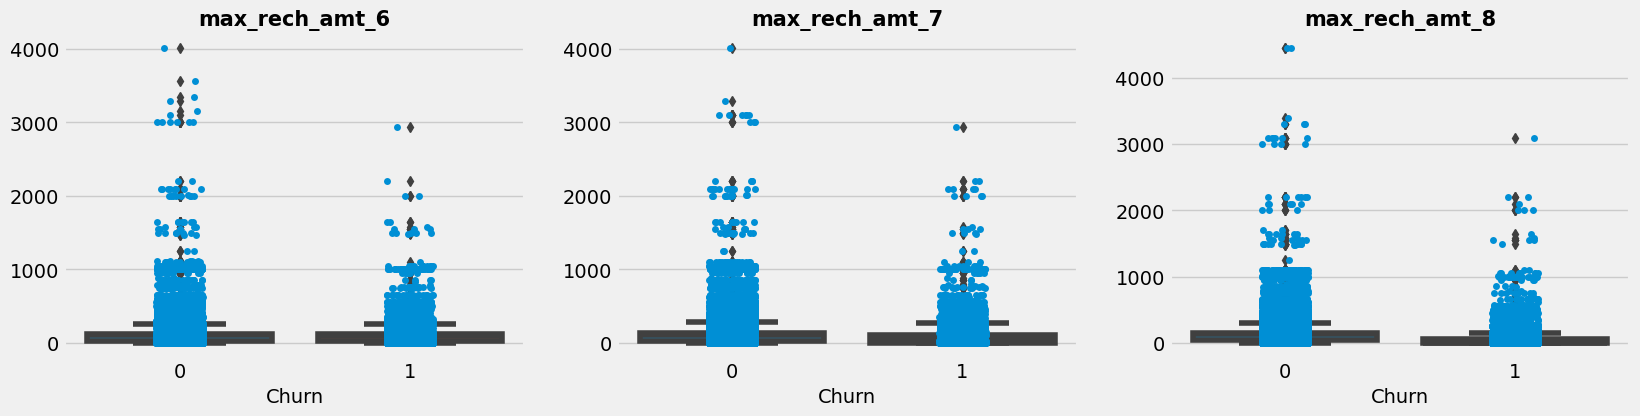

In [27]:
dist_box_plot(df,['max_rech_amt_6','max_rech_amt_7','max_rech_amt_8'])

Looks like Max Recharge Amount is decreased in 8th month for Churn customers.

### last_day_rch_amt (Last day Reacharge Amount)

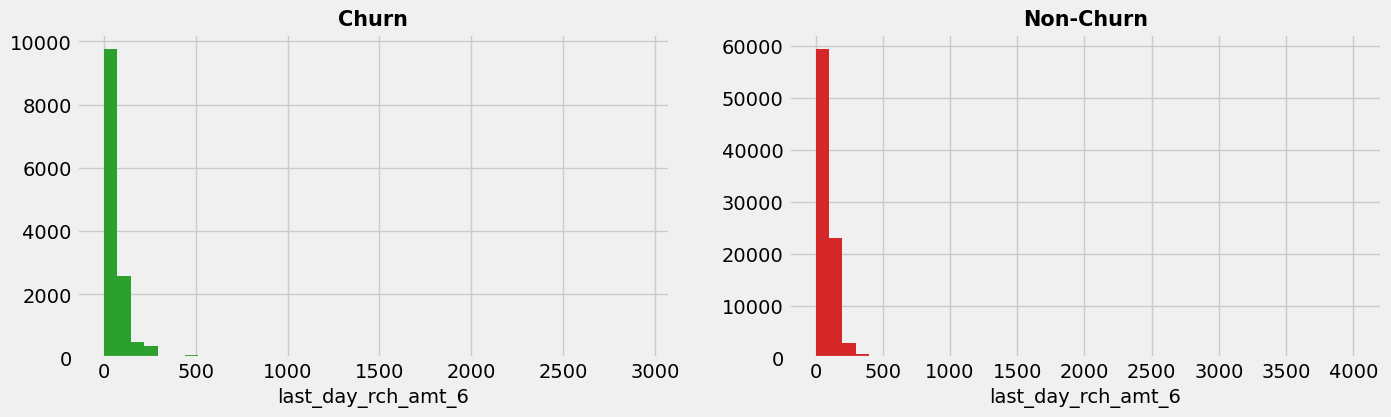

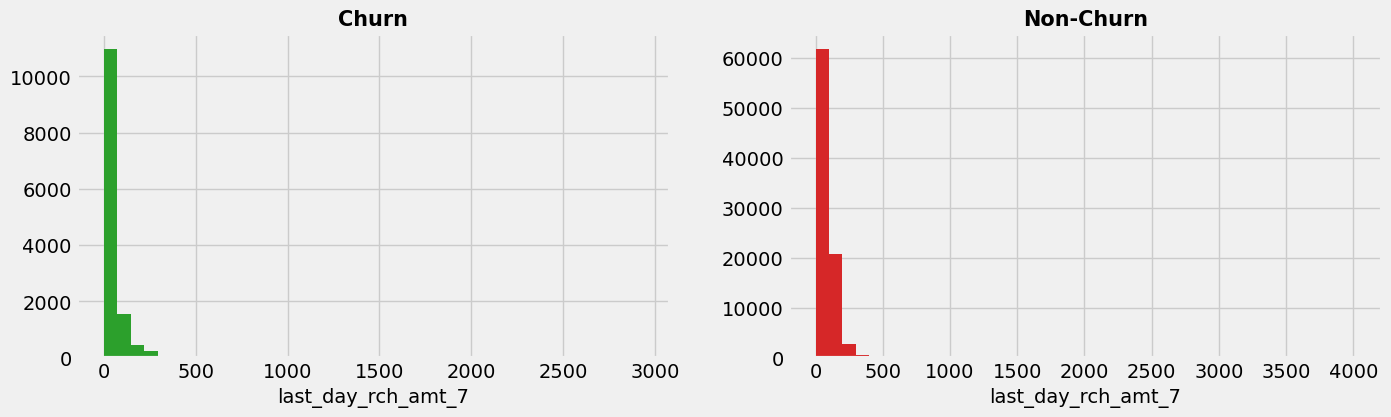

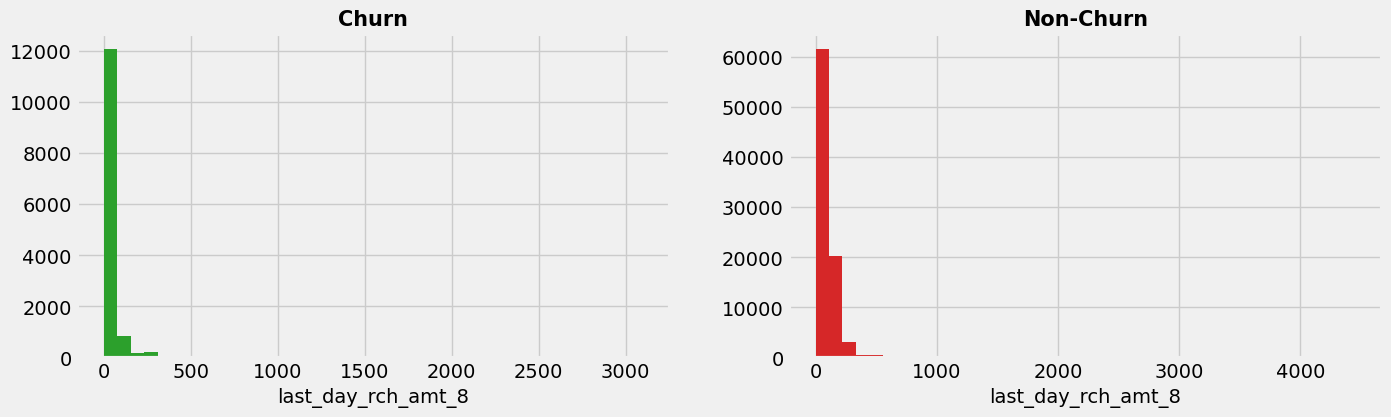

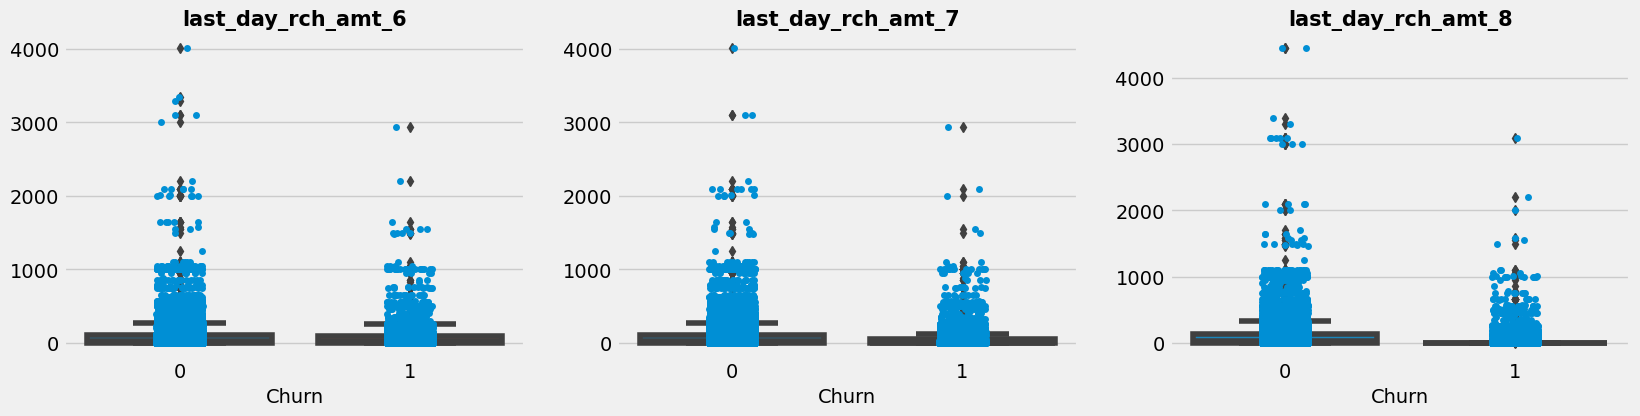

In [28]:
dist_box_plot(df,['last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8'])


Last day Reacharge decreased in in 8th month for churn customers.

### max_rech_data (Max Reachrge Data)

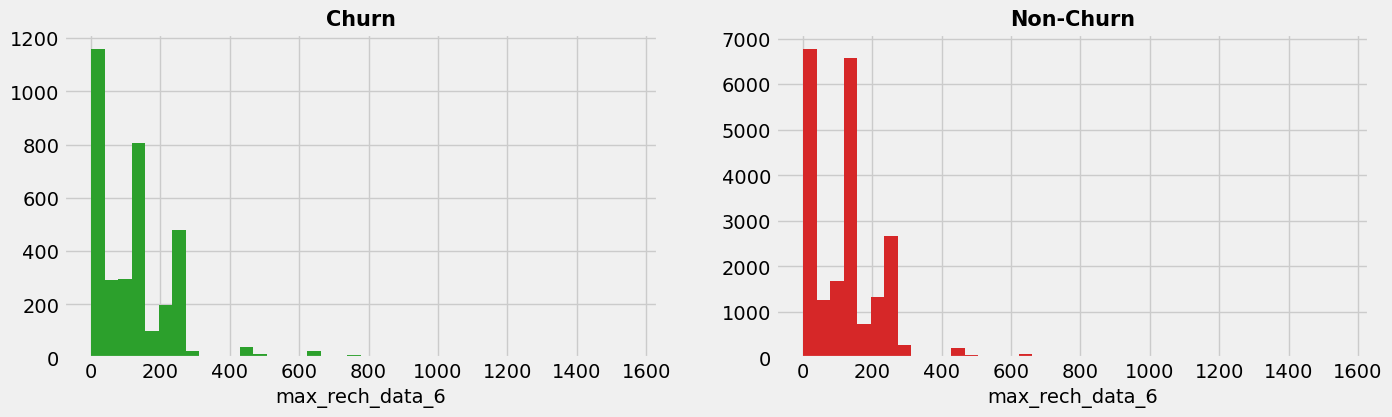

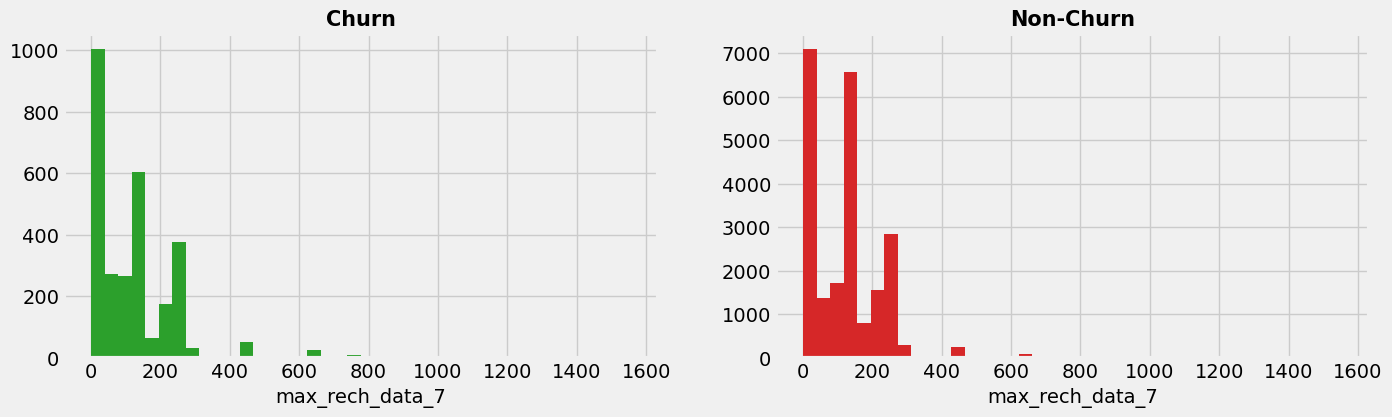

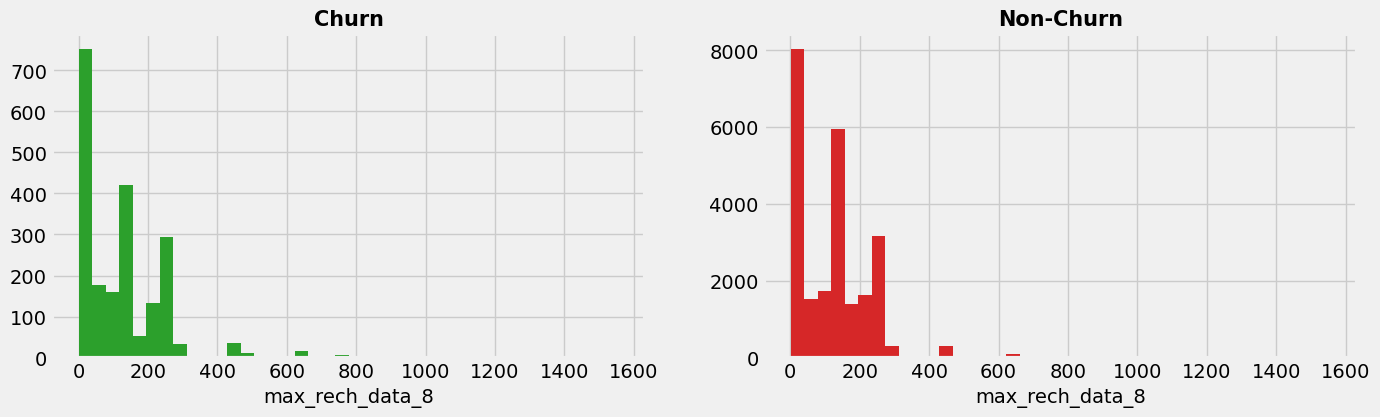

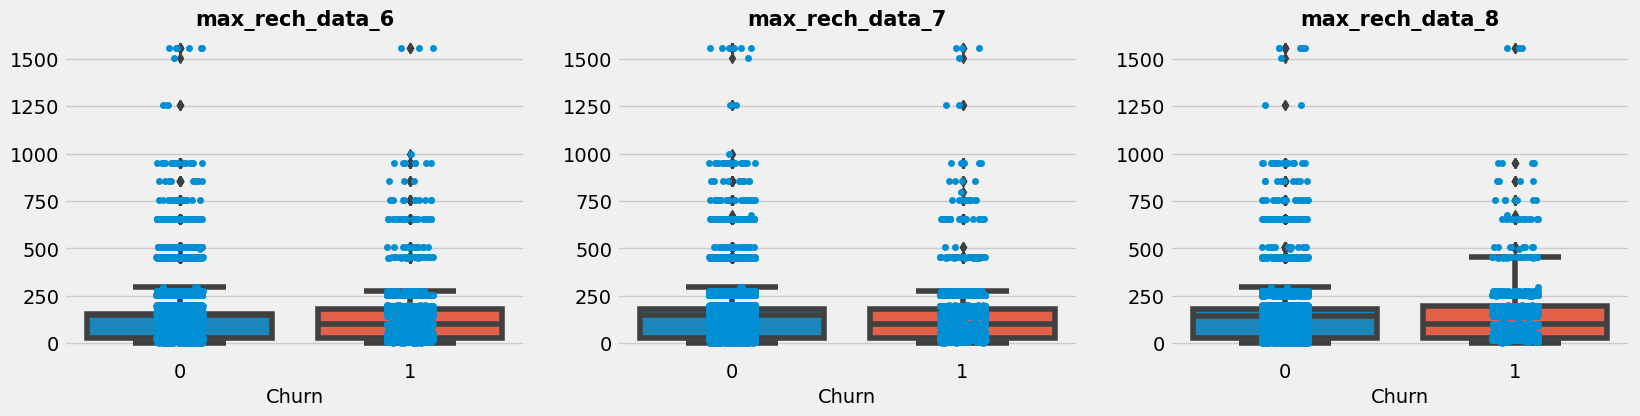

In [29]:
dist_box_plot(df,['max_rech_data_6','max_rech_data_7','max_rech_data_8'])

Max recharge data reduced for 8th month churn customers.It looks like many customers are using high data as their huge outliers.

### av_rech_amt_data (Average recharge amount data)

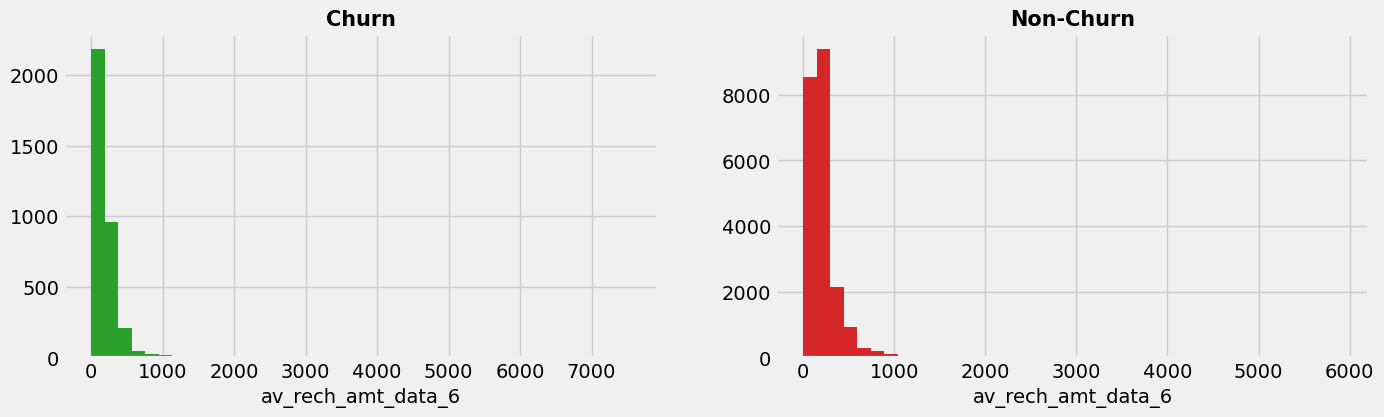

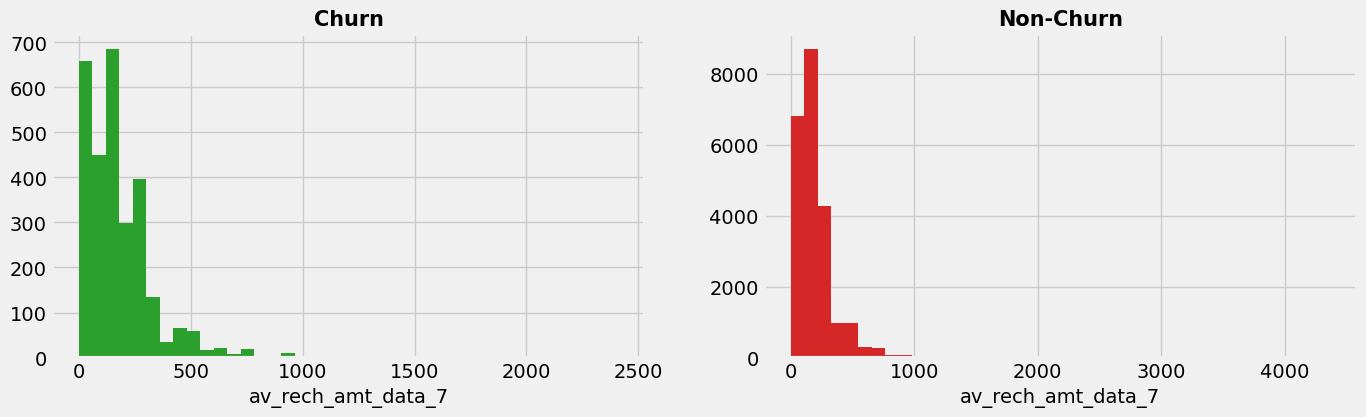

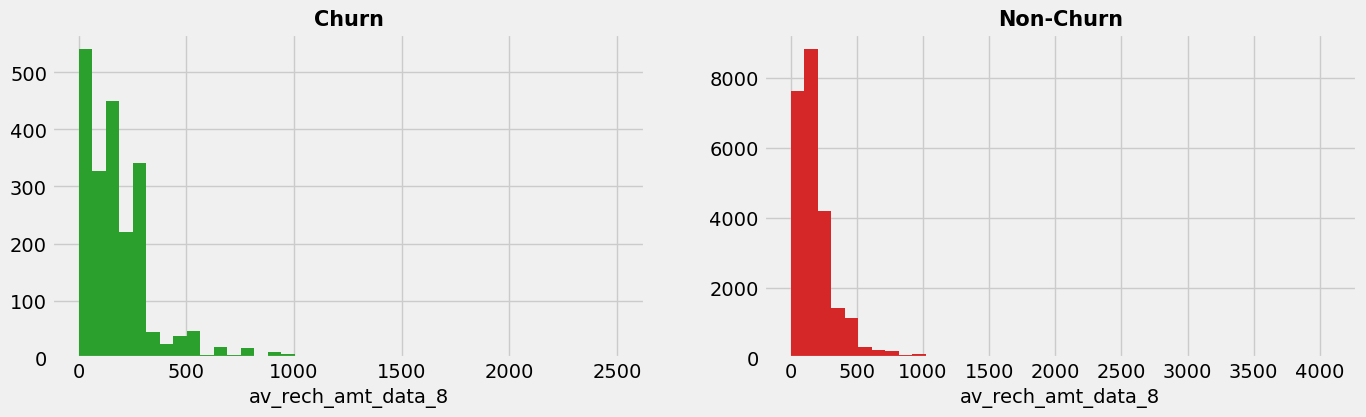

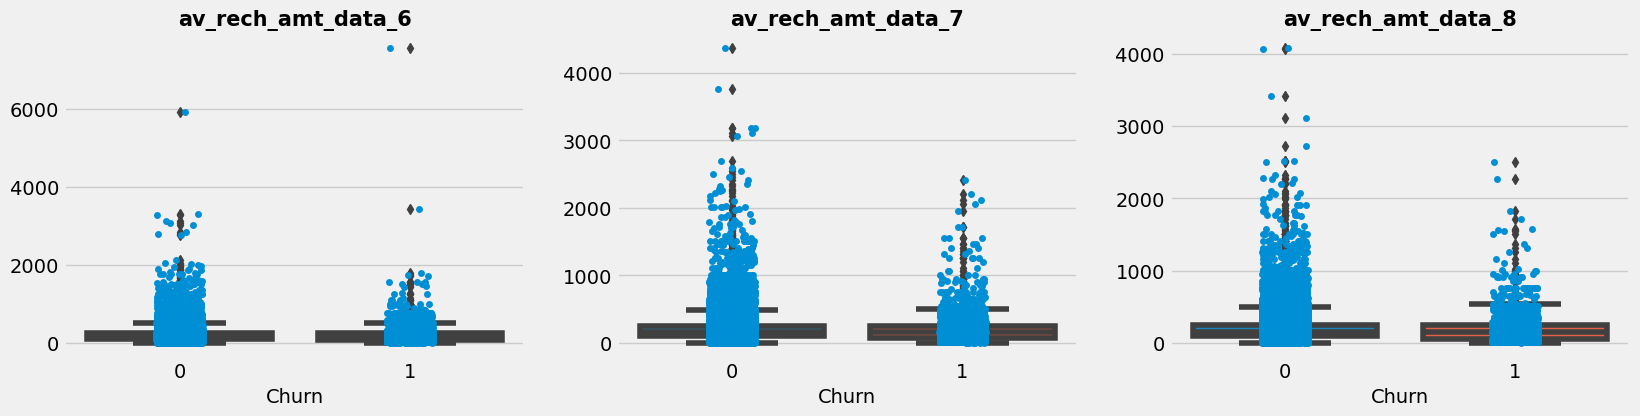

In [30]:
dist_box_plot(df,['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8'])

Average recharge amount data is decreased in 8th month for churn customers.

### aon(Age on network - number of days the customer is using the operator )

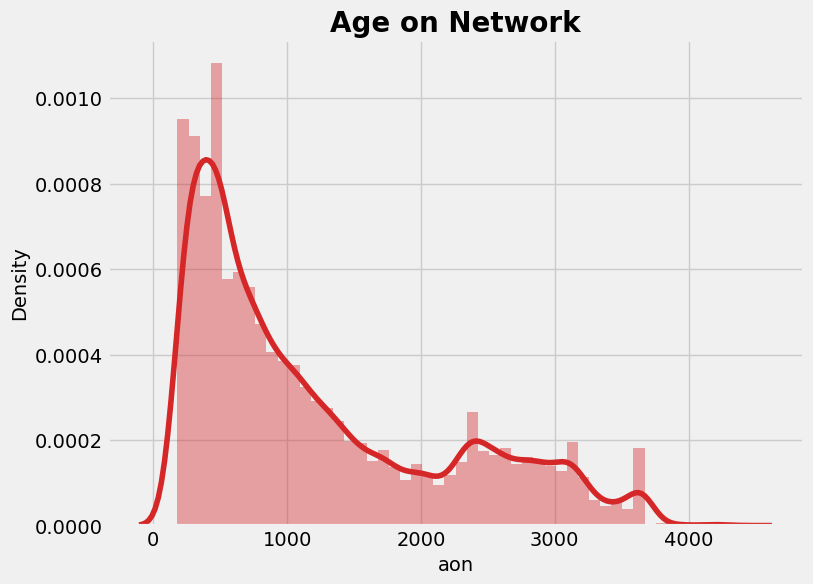

In [31]:
plt.figure(figsize=(8,6))
ax=sns.distplot(df['aon'],color='#d62728',hist_kws={"alpha": 0.4})
ax.set_title('Age on Network',fontweight='bold',size=20)
plt.show()

For most of the customers Age on Network is around 800-900 days. There are outliers too as the maximum value is 4000+

# 3. Data Analysis

## 3.1 Univariate Analysis

GridSpec(6, 5)

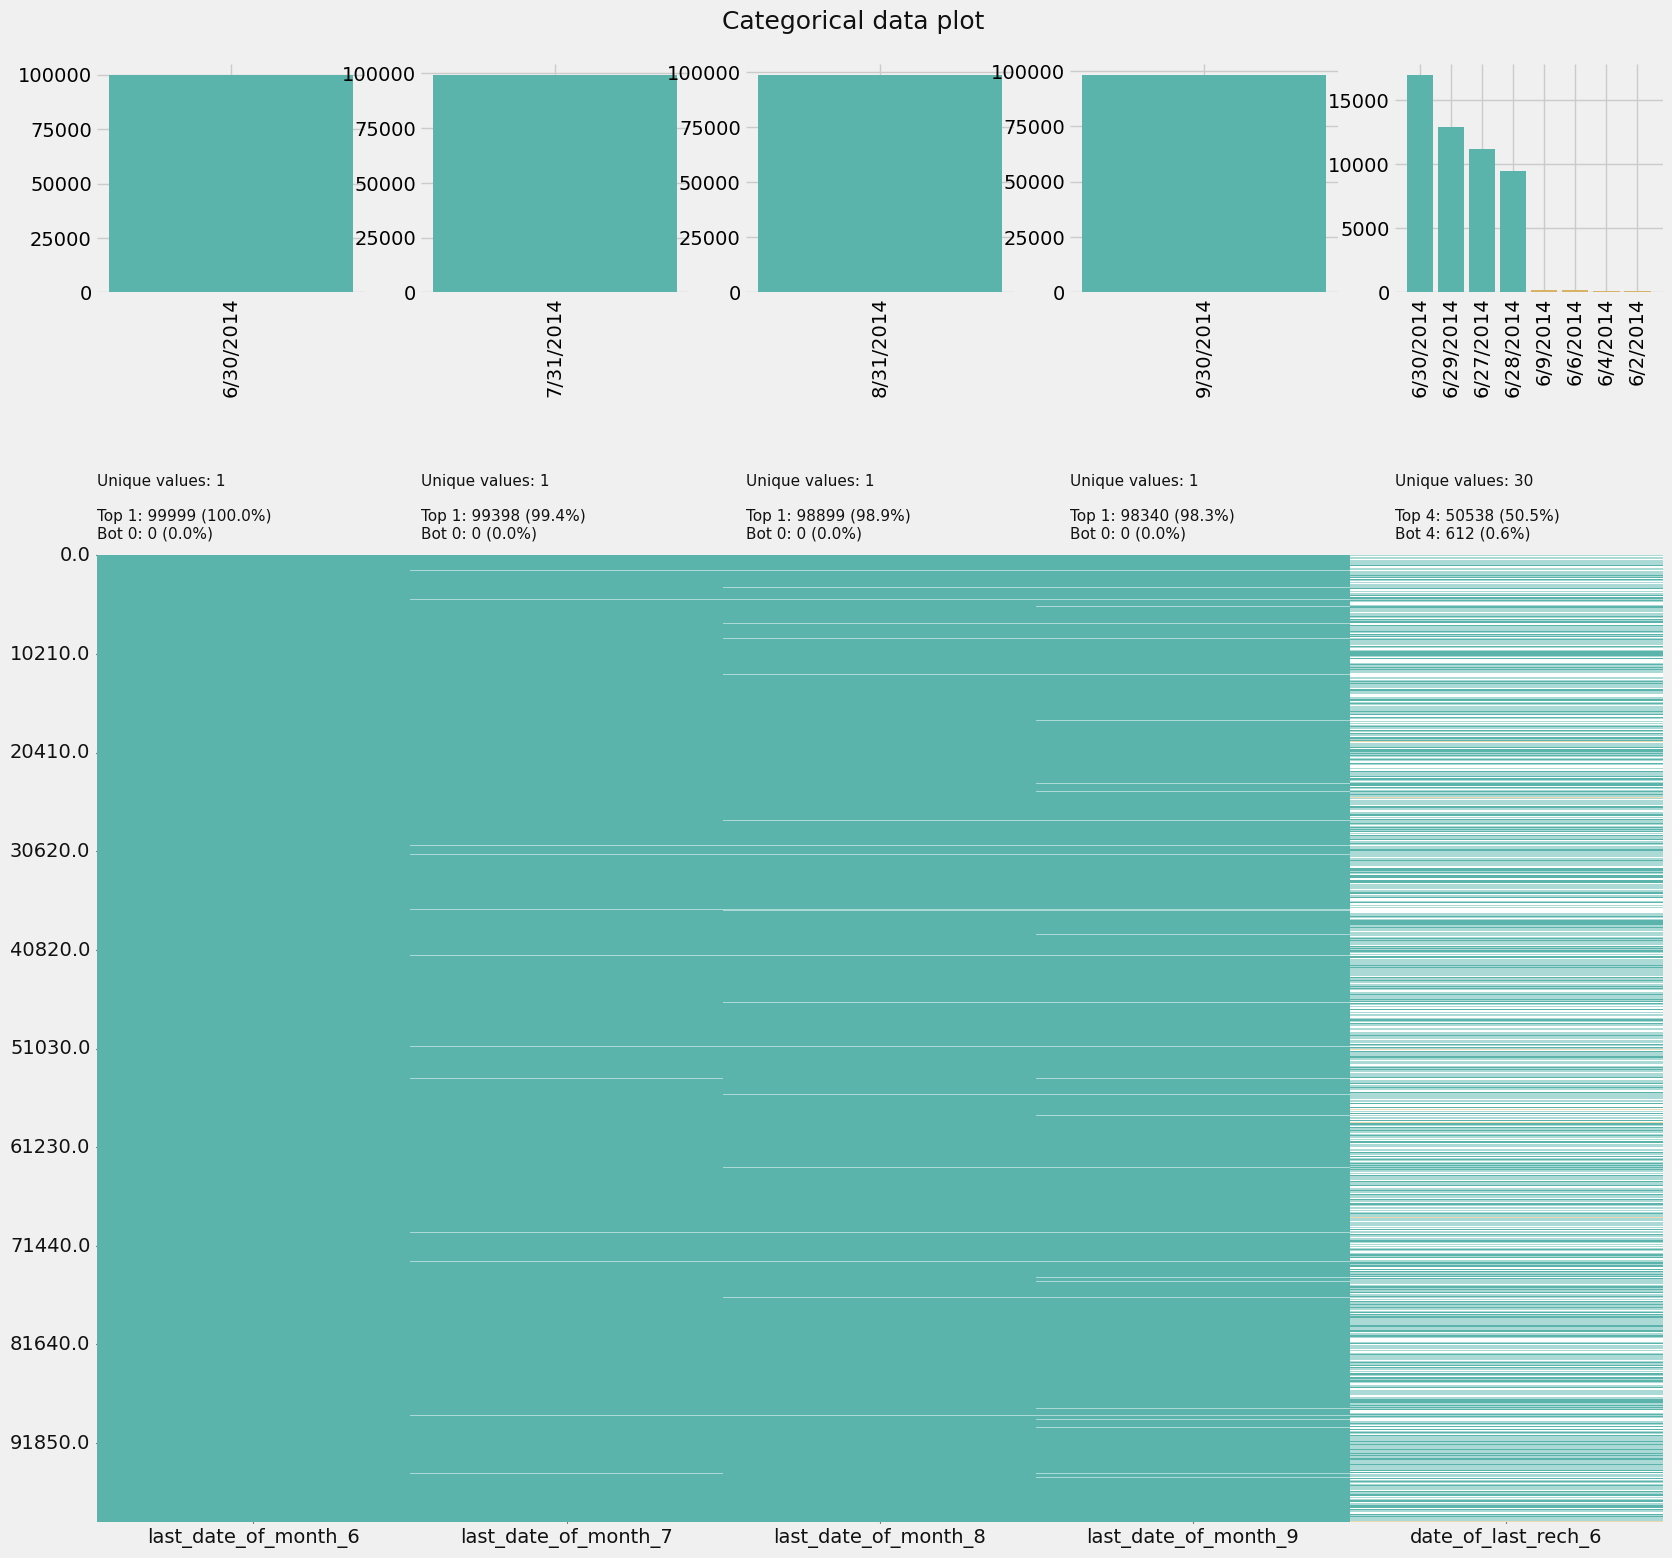

In [32]:
df_cat = df.select_dtypes('object')
klib.cat_plot(df_cat.iloc[:,:5], top=4, bottom=4)

GridSpec(6, 4)

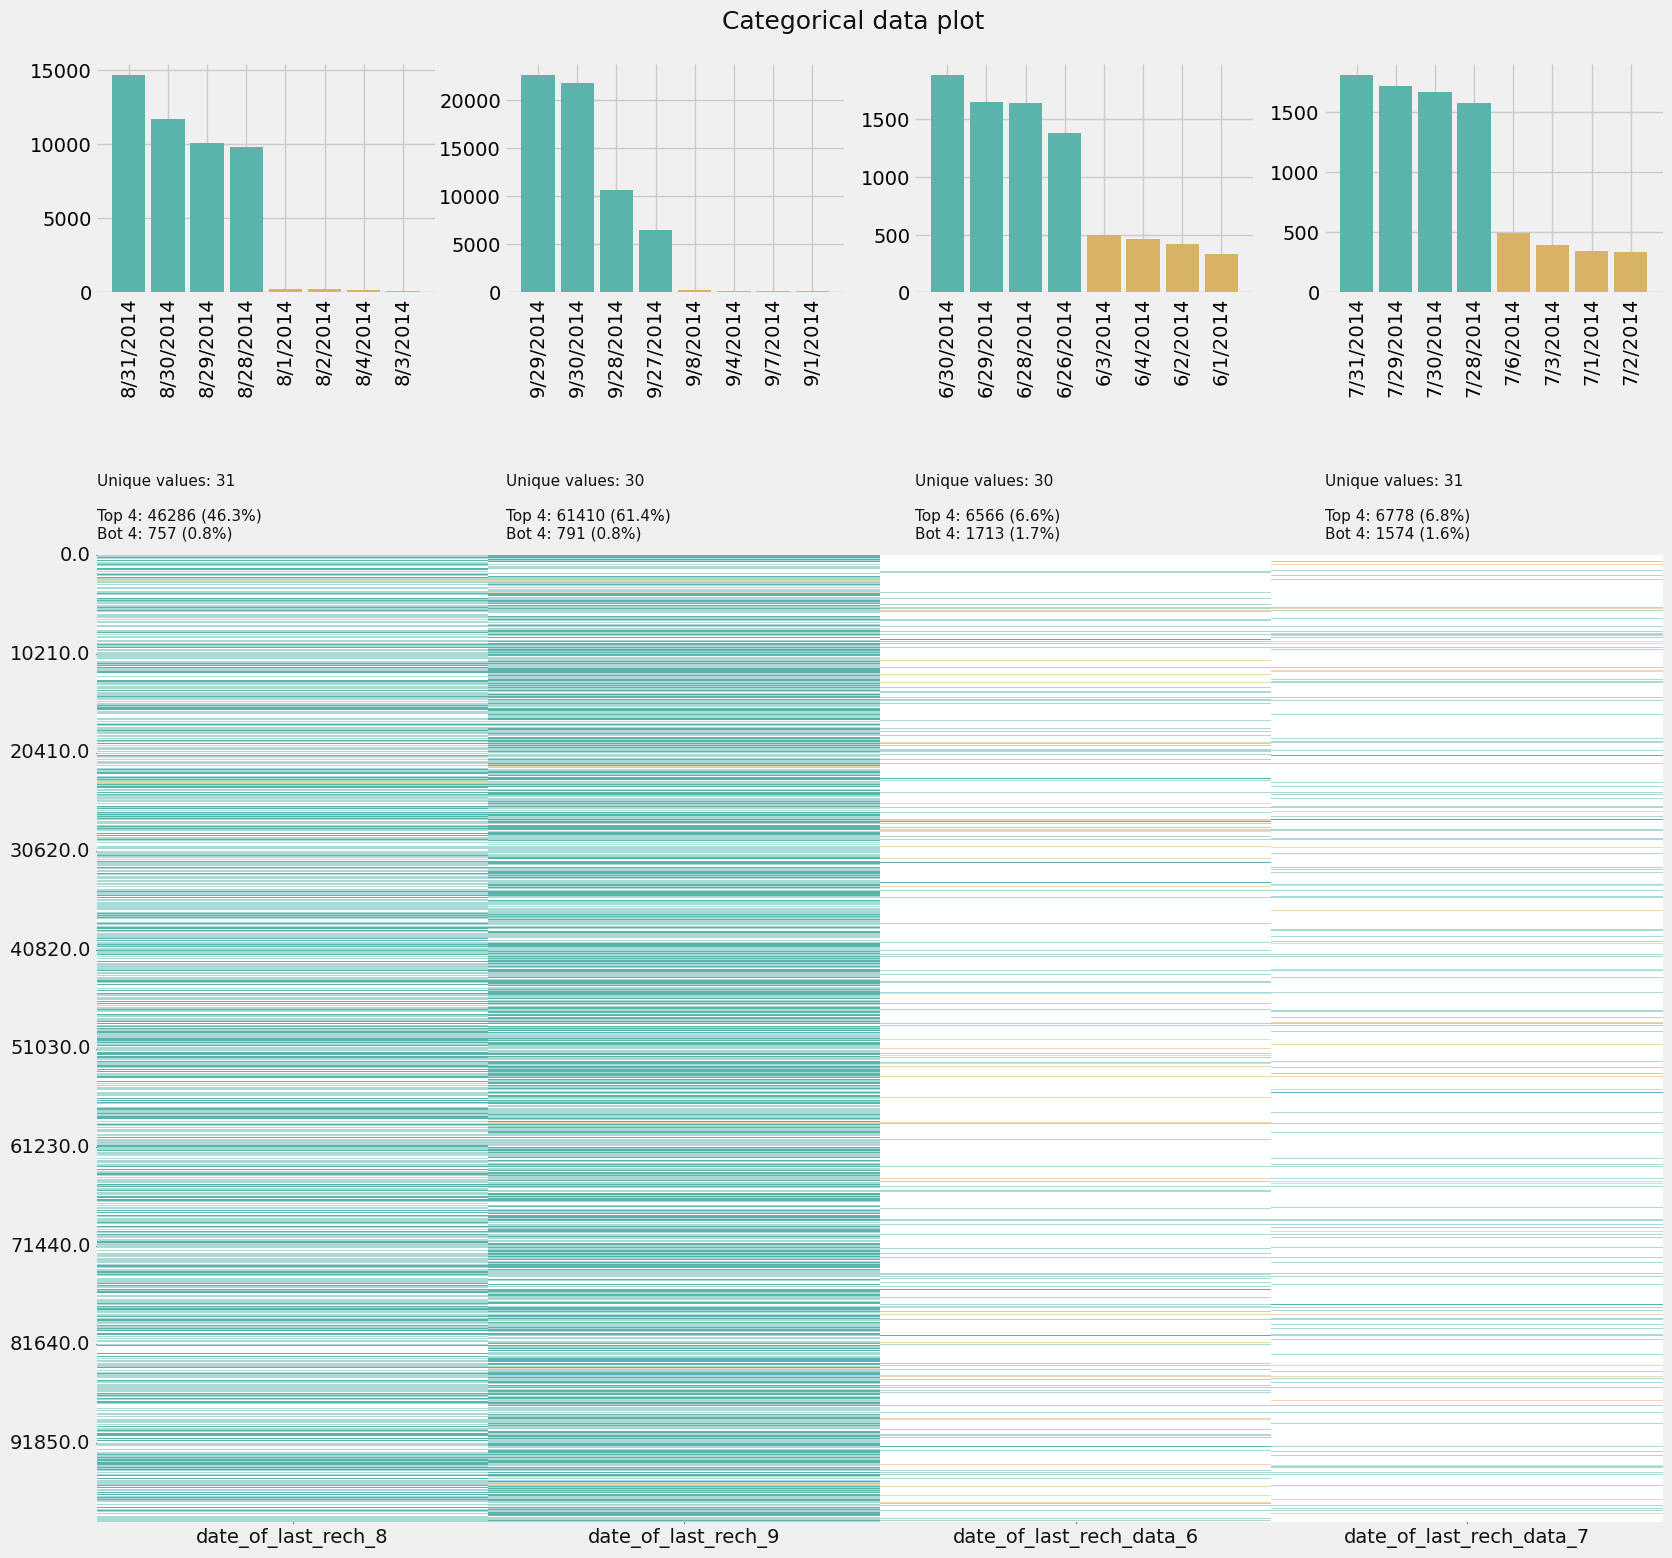

In [33]:
klib.cat_plot(df_cat.iloc[:,6:10], top=4, bottom=4)

<h3><font color=red>OBSERVATIONS</font></h3>

&#9658;  <br><br>
&#9658; Need to follow appropirate sampling strategy for train & test split <br><br>
&#9658; Sensitivity will be appropirate measure for this unbalaced classification problem <br><br>

## 3.1 Bivariate Analysis 

<Axes: title={'center': 'Feature-correlation (pearson)'}>

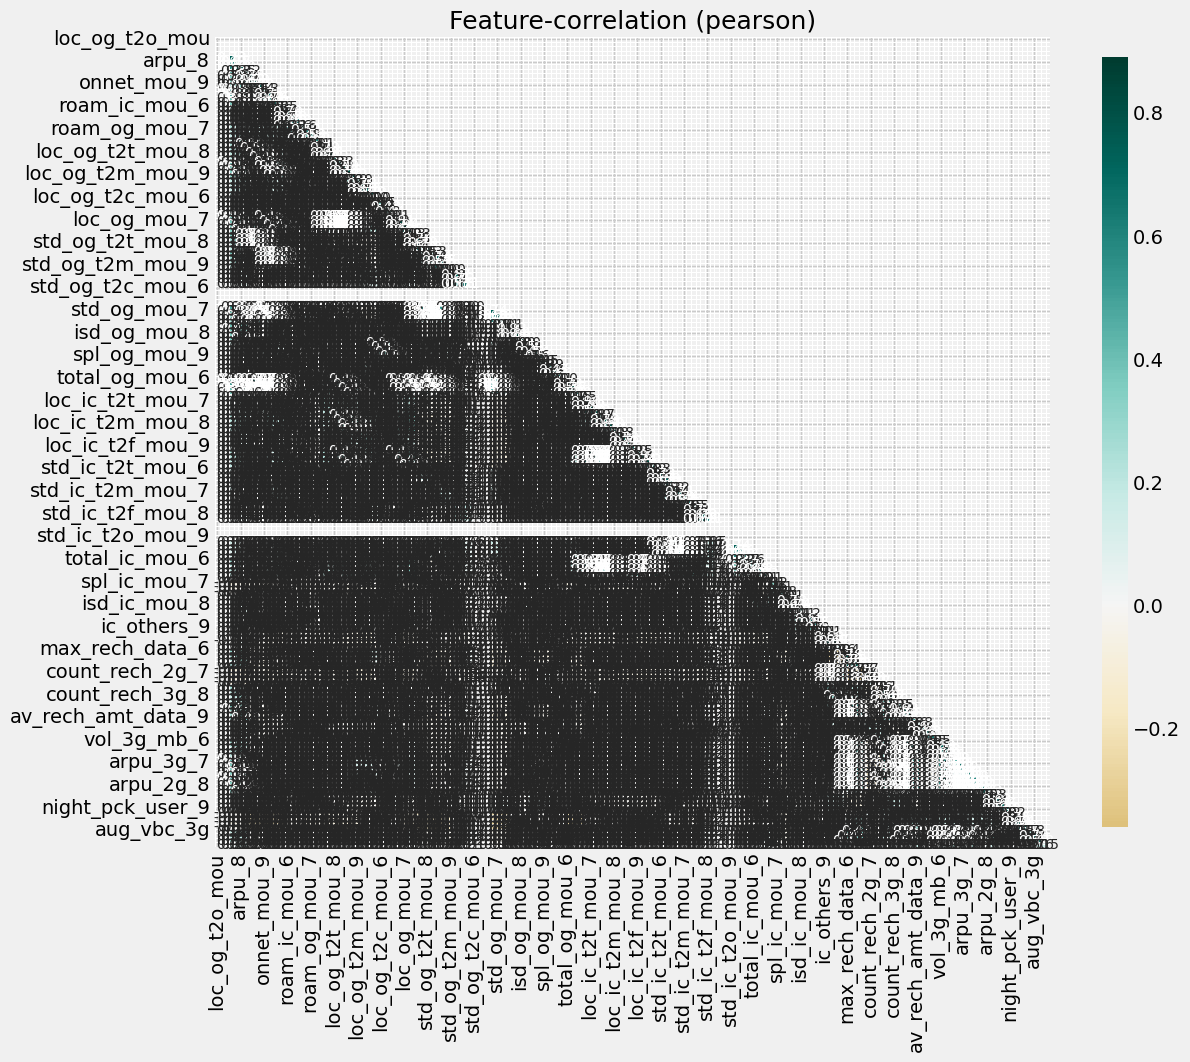

In [34]:
klib.corr_plot(df.select_dtypes('float'))

<h3><font color=red>OBSERVATIONS</font></h3>

&#9658; Features with missing values more than 20% is not considered for modeling <br><br>
&#9658; Mdedian & KNN imputation is used for missing values less than 20 percentage <br><br>

In [35]:
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

# 3. Feature Engineering

### 3.1 Removing the columns which is not required

In [36]:
final_cols = [ x for x in df_HVC.columns if x not in missing_smmry[missing_smmry['Missing_Percentage']>20].sort_values('Missing_Percentage',ascending=False)['field_name'].to_list()]
df_HVC_trim = df_HVC[final_cols]
final_cols_mth_ignore = [x for x in final_cols if x not in df_HVC_trim.filter(like="month_").columns.to_list()]
df_HVC_trim = df_HVC[final_cols_mth_ignore]
final_cols_9th_mth_ignore = [x for x in final_cols_mth_ignore if x not in df_HVC_trim.filter(like='_9',axis=1).columns.to_list()]
df_HVC_trim = df_HVC[final_cols_9th_mth_ignore]

##### Note -> **_9 columns are removed from the dataset & Constant dates bacause there is no variance with predictor variable

In [37]:
df_HVC_trim.select_dtypes("float").head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
3              0.0             0.0             0.0   221.338   251.102   
7              0.0             0.0             0.0  1069.180  1349.850   
13             0.0             0.0             0.0   492.846   205.671   
15             0.0             0.0             0.0    31.000   510.465   
21             0.0             0.0             0.0   514.453   597.753   

      arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
3    508.054        99.91        54.39       310.98        123.31   
7   3171.480        57.84        54.68        52.29        453.43   
13   593.260       501.76       108.39       534.24        413.31   
15   590.643          NaN       246.56       280.31           NaN   
21   637.760       102.41       132.11        85.14        757.93   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
3         109.01         71.68           0.00          54.86          44.38   
7         567.16        325.91          16.23          33.49          31.64   
13        119.28        482.46          23.53         144.24          72.11   
15        839.58       1011.91            NaN           0.00           0.00   
21        896.68        983.39           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
3            0.00          28.09          39.04             73.68   
7           23.74          12.59          38.06             51.39   
13           7.98          35.26           1.44             49.63   
15            NaN           0.88           0.00               NaN   
21           0.00           0.00           0.00              4.48   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
3              34.81             10.61            107.43             83.21   
7              31.38             40.28            308.63            447.38   
13              6.19             36.01            151.13             47.28   
15             16.13             44.79               NaN             38.99   
21              6.16             23.34             91.81             87.93   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
3              22.46              1.91              0.65              4.91   
7             162.28             62.13             55.14             53.23   
13            294.46              4.54              0.00             23.51   
15             92.53               NaN              5.13              4.83   
21            104.81              0.75              0.00              1.58   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
3                0.0              0.00              0.00        183.03   
7                0.0              0.00              0.00        422.16   
13               0.0              0.00              0.49        205.31   
15               NaN              9.78              0.00           NaN   
21               0.0              0.00              0.00         97.04   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
3         118.68         37.99             26.23             14.89   
7         533.91        255.79              4.30             23.29   
13         53.48        353.99            446.41             85.98   
15         60.26        142.16               NaN            230.43   
21         94.09        129.74             97.93            125.94   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
3             289.58              2.99              1.73              6.53   
7              12.01             49.89             31.76             49.14   
13            498.23            255.36             52.94            156.94   
15            235.51               NaN            775.66            914.54   
21             61.79            665.36            808.74    

In [38]:
missing_smmry[missing_smmry['Missing_Percentage']>20].sort_values('Missing_Percentage',ascending=False)

field_name  Missing_Percentage
157  date_of_last_rech_data_6           74.846748
165           max_rech_data_6           74.846748
217                 fb_user_6           74.846748
197          night_pck_user_6           74.846748
193                 arpu_2g_6           74.846748
189                 arpu_3g_6           74.846748
173           count_rech_3g_6           74.846748
169           count_rech_2g_6           74.846748
177        av_rech_amt_data_6           74.846748
161         total_rech_data_6           74.846748
166           max_rech_data_7           74.428744
158  date_of_last_rech_data_7           74.428744
218                 fb_user_7           74.428744
198          night_pck_user_7           74.428744
194                 arpu_2g_7           74.428744
190                 arpu_3g_7           74.428744
178        av_rech_amt_data_7           74.428744
162         total_rech_data_7           74.428744
170           count_rech_2g_7           74.428744
174           count_rech_3g_7           74.428744
192                 arpu_3g_9           74.077741
168           max_rech_data_9           74.077741
200          night_pck_user_9           74.077741
164         total_rech_data_9           74.077741
160  date_of_last_rech_data_9           74.077741
196                 arpu_2g_9           74.077741
176           count_rech_3g_9           74.077741
220                 fb_user_9           74.077741
172           count_rech_2g_9           74.077741
180        av_rech_amt_data_9           74.077741
171           count_rech_2g_8           73.660737
191                 arpu_3g_8           73.660737
195                 arpu_2g_8           73.660737
167           max_rech_data_8           73.660737
199          night_pck_user_8           73.660737
179        av_rech_amt_data_8           73.660737
159  date_of_last_rech_data_8           73.660737
163         total_rech_data_8           73.660737
219                 fb_user_8           73.660737
175           count_rech_3g_8           73.660737

In [39]:
len(df_HVC_trim.columns)

141

### 3.2 Removing the unique ID Columns

In [40]:
df_HVC_trim.select_dtypes("object").columns
df_HVC_trim_num  = df_HVC_trim.select_dtypes("number")
df_HVC_trim_num = df_HVC_trim_num.reset_index()
id_cols = ['index','mobile_number','circle_id']
num_col_to_consider = [x for x in df_HVC_trim_num.columns if x not in id_cols]
df_HVC_trim_num = df_HVC_trim_num[num_col_to_consider]


In [41]:
len(df_HVC_trim_num.columns)

136

In [42]:
df_HVC_trim_catagory= df_HVC_trim.select_dtypes("object")

GridSpec(6, 6)

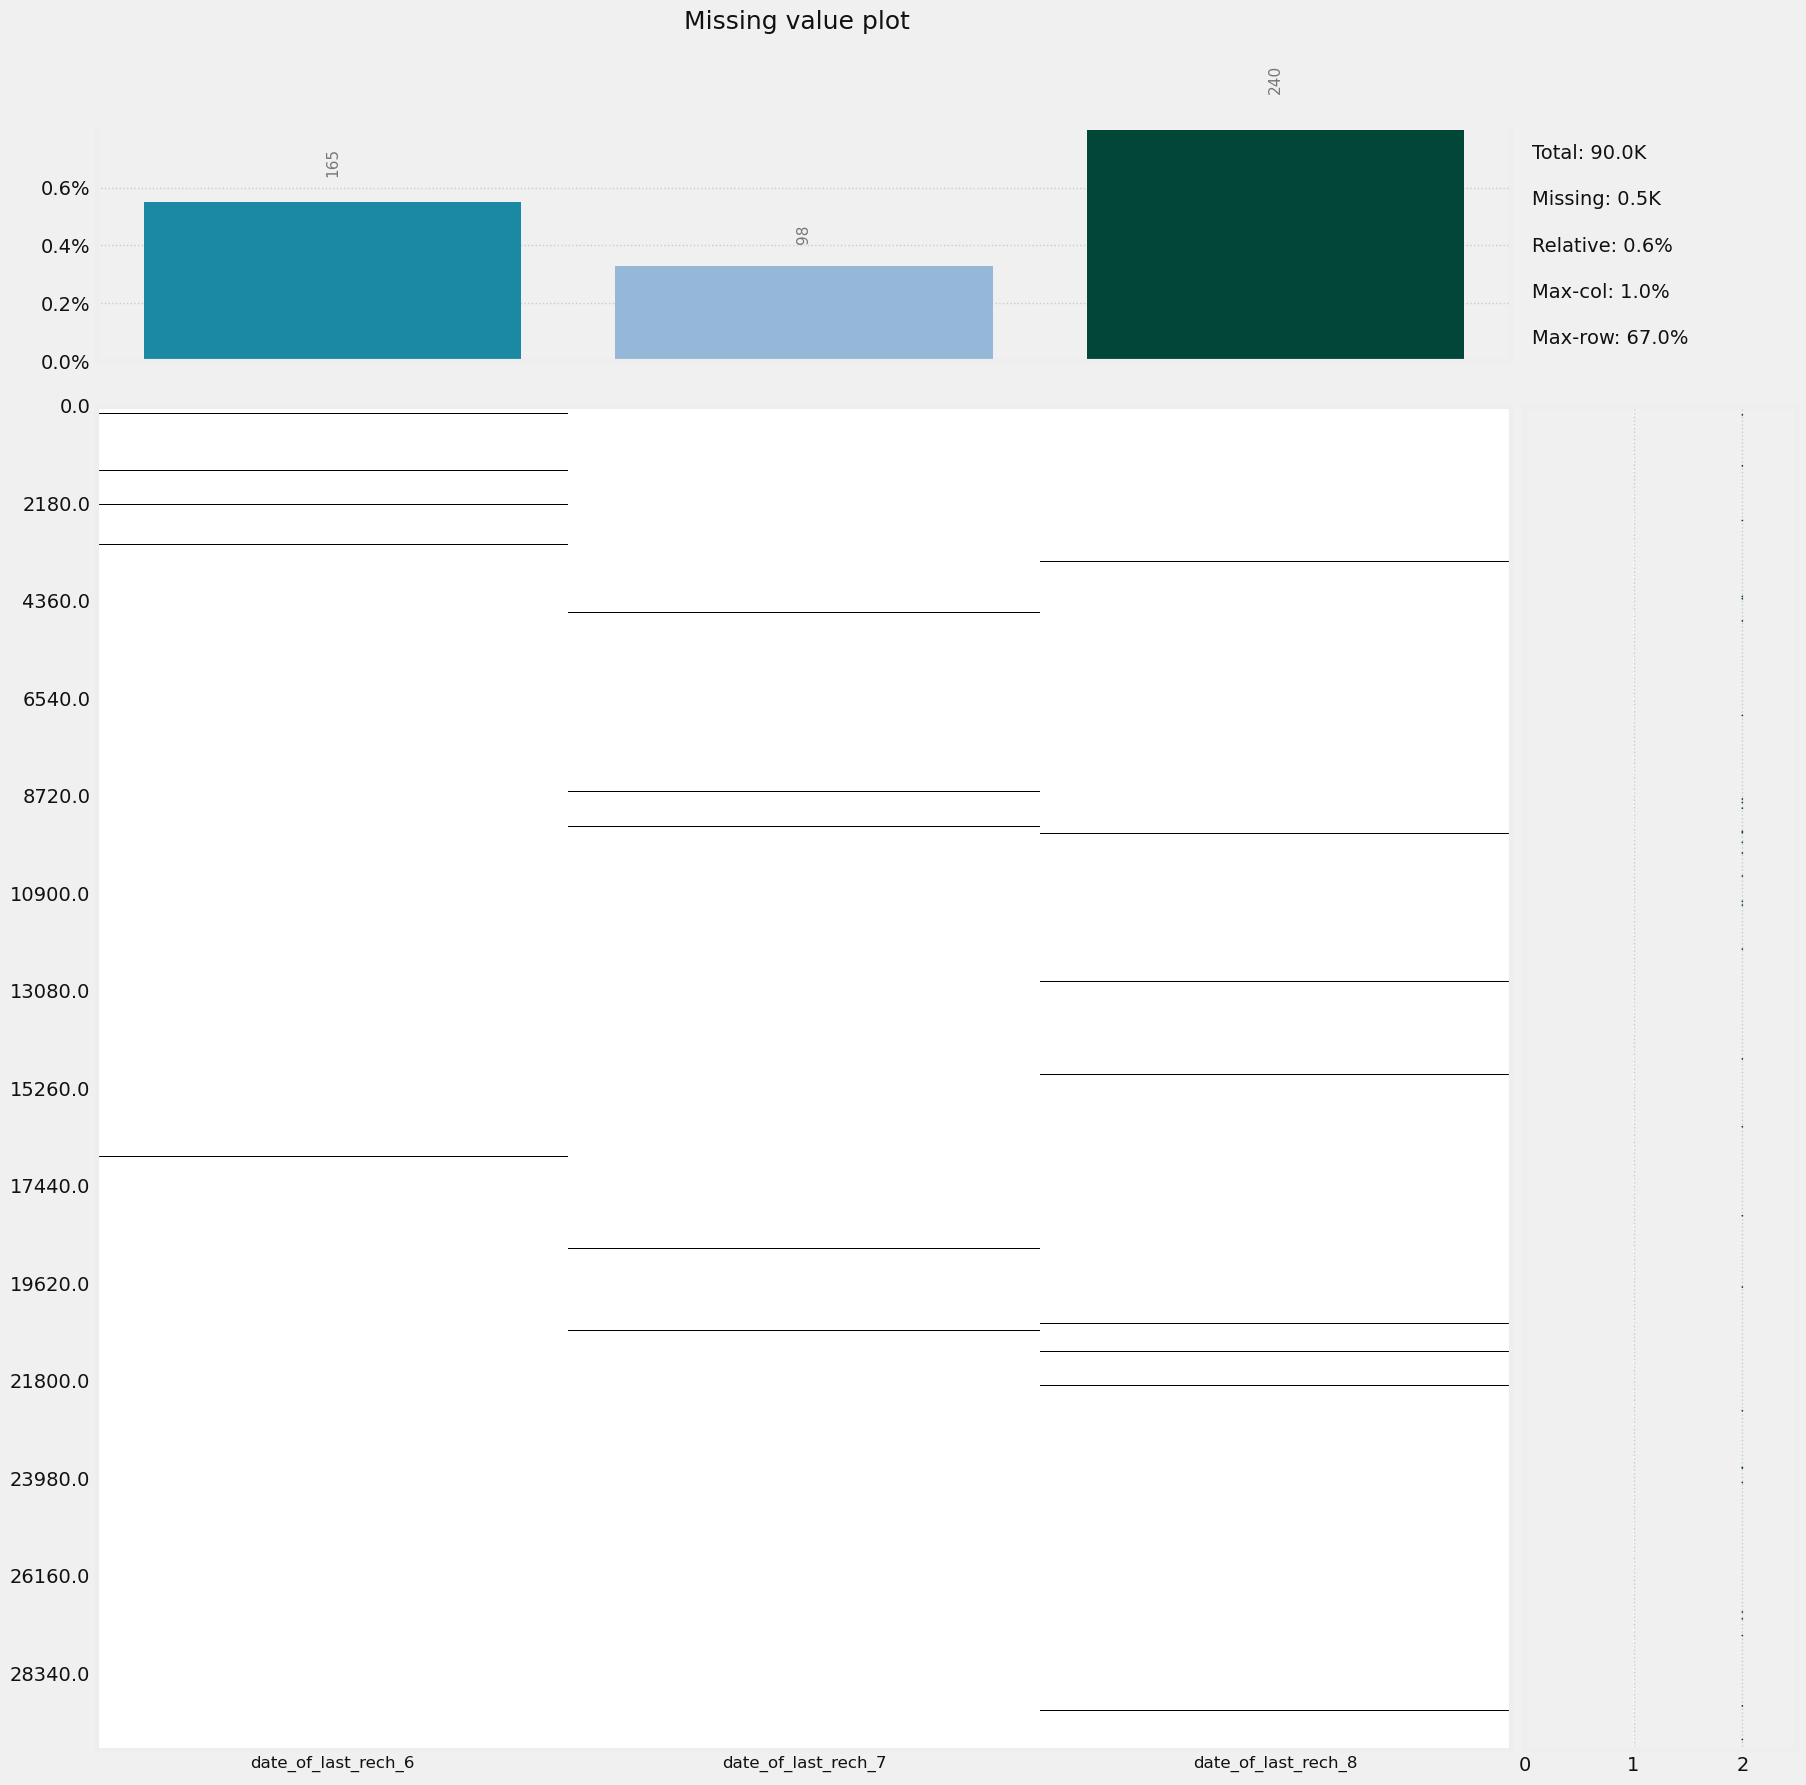

In [43]:
klib.missingval_plot(df_HVC_trim_catagory)

### 3.3 Handling Catagorical Variables

In [44]:
for x in df_HVC_trim_catagory.columns:
    df_HVC_trim_catagory[x].fillna(df_HVC_trim_catagory[x].mode(),inplace=True)
    df_HVC_trim_catagory[x] = pd.to_datetime(df_HVC_trim_catagory[x])
    df_HVC_trim_catagory[x]=df_HVC_trim_catagory[x].dt.day
df_HVC_trim_catagory.reset_index(inplace=True)
df_HVC_trim_catagory.drop(columns='index',axis=1,inplace=True)

for x in df_HVC_trim_catagory.columns:
    df_HVC_trim_catagory[x].fillna(df_HVC_trim_catagory[x].median(),inplace=True)

In [45]:
df_HVC_trim_final = pd.concat([df_HVC_trim_num,df_HVC_trim_catagory],axis=1)

In [46]:
len(df_HVC_trim_final.columns)

139

In [47]:
df_HVC_trim_final.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0             0.0             0.0             0.0   221.338   251.102   
1             0.0             0.0             0.0  1069.180  1349.850   
2             0.0             0.0             0.0   492.846   205.671   
3             0.0             0.0             0.0    31.000   510.465   
4             0.0             0.0             0.0   514.453   597.753   

     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   508.054        99.91        54.39       310.98        123.31   
1  3171.480        57.84        54.68        52.29        453.43   
2   593.260       501.76       108.39       534.24        413.31   
3   590.643          NaN       246.56       280.31           NaN   
4   637.760       102.41       132.11        85.14        757.93   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0        109.01         71.68           0.00          54.86          44.38   
1        567.16        325.91          16.23          33.49          31.64   
2        119.28        482.46          23.53         144.24          72.11   
3        839.58       1011.91            NaN           0.00           0.00   
4        896.68        983.39           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00          28.09          39.04             73.68   
1          23.74          12.59          38.06             51.39   
2           7.98          35.26           1.44             49.63   
3            NaN           0.88           0.00               NaN   
4           0.00           0.00           0.00              4.48   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             34.81             10.61            107.43             83.21   
1             31.38             40.28            308.63            447.38   
2              6.19             36.01            151.13             47.28   
3             16.13             44.79               NaN             38.99   
4              6.16             23.34             91.81             87.93   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0             22.46              1.91              0.65              4.91   
1            162.28             62.13             55.14             53.23   
2            294.46              4.54              0.00             23.51   
3             92.53               NaN              5.13              4.83   
4            104.81              0.75              0.00              1.58   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0              0.00              0.00        183.03   
1               0.0              0.00              0.00        422.16   
2               0.0              0.00              0.49        205.31   
3               NaN              9.78              0.00           NaN   
4               0.0              0.00              0.00         97.04   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0        118.68         37.99             26.23             14.89   
1        533.91        255.79              4.30             23.29   
2         53.48        353.99            446.41             85.98   
3         60.26        142.16               NaN            230.43   
4         94.09        129.74             97.93            125.94   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0            289.58              2.99              1.73              6.53   
1             12.01             49.89             31.76             49.14   
2            498.23            255.36             52.94            156.94   
3            235.51               NaN            775.66            914.54   
4             61.79            665.36            808.74            876.99   

   std_og_t2f_mou_6  std_og_t2f_mo

#### Not using date columns in scaling

In [48]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()

In [49]:
df_HVC_trim_final_minmax = pd.DataFrame(trans.fit_transform(df_HVC_trim_num[df_HVC_trim_num.columns.to_list()]),columns=df_HVC_trim_num.columns.to_list())

In [50]:
df_HVC_trim_final_minmax.Churn.value_counts(normalize=True)*100

0.0    94.959187
1.0     5.040813
Name: Churn, dtype: float64

In [51]:
df_HVC_trim_final_minmax.isna().sum()/len(df_HVC_trim_final_minmax)*100

loc_og_t2o_mou    0.253207
std_og_t2o_mou    0.253207
loc_ic_t2o_mou    0.253207
arpu_6            0.000000
arpu_7            0.000000
                    ...   
jul_vbc_3g        0.000000
jun_vbc_3g        0.000000
sep_vbc_3g        0.000000
total_rech_amt    0.000000
Churn             0.000000
Length: 136, dtype: float64

In [52]:
df_HVC_trim_final_minmax.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0             0.0             0.0             0.0  0.082696  0.060957   
1             0.0             0.0             0.0  0.110967  0.090525   
2             0.0             0.0             0.0  0.091750  0.059734   
3             0.0             0.0             0.0  0.076350  0.067936   
4             0.0             0.0             0.0  0.092470  0.070285   

     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0  0.042154     0.013544     0.006667     0.028921      0.014746   
1  0.119378     0.007841     0.006703     0.004863      0.054223   
2  0.044624     0.068019     0.013287     0.049685      0.049425   
3  0.044548          NaN     0.030224     0.026069           NaN   
4  0.045915     0.013883     0.016194     0.007918      0.090636   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0      0.011276      0.005117       0.000000       0.014387       0.010643   
1      0.058669      0.023267       0.006211       0.008782       0.007588   
2      0.012339      0.034443       0.009004       0.037826       0.017293   
3      0.086849      0.072241            NaN       0.000000       0.000000   
4      0.092756      0.070205       0.000000       0.000000       0.000000   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0       0.000000       0.009989       0.007315          0.011456   
1       0.006289       0.004477       0.007131          0.007991   
2       0.002114       0.012539       0.000270          0.007717   
3            NaN       0.000313       0.000000               NaN   
4       0.000000       0.000000       0.000000          0.000697   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0          0.004704          0.000987          0.022714          0.018259   
1          0.004240          0.003746          0.065253          0.098171   
2          0.000836          0.003349          0.031953          0.010375   
3          0.002180          0.004166               NaN          0.008556   
4          0.000832          0.002171          0.019411          0.019295   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0          0.004527          0.001303          0.000543          0.005288   
1          0.032709          0.042380          0.046087          0.057330   
2          0.059351          0.003097          0.000000          0.025321   
3          0.018650               NaN          0.004288          0.005202   
4          0.021125          0.000512          0.000000          0.001702   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0          0.000000          0.000000      0.017197   
1               0.0          0.000000          0.000000      0.039664   
2               0.0          0.000000          0.000976      0.019290   
3               NaN          0.017167          0.000000           NaN   
4               0.0          0.000000          0.000000      0.009117   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0      0.015464      0.003441          0.003561          0.001831   
1      0.069567      0.023170          0.000584          0.002863   
2      0.006968      0.032065          0.060599          0.010571   
3      0.007852      0.012877               NaN          0.028330   
4      0.012260      0.011752          0.013294          0.015484   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0          0.036132          0.000360          0.000186          0.000468   
1          0.001499          0.006000          0.003421          0.003523   
2          0.062167          0.030712          0.005702          0.011250   
3          0.029386               NaN          0.083541          0.065558   
4          0.007710          0.080022          0.087104          0.062866   

   std_og_t2f_mou_6  std_og_t2f_mo

### 3.4 Correlation Study

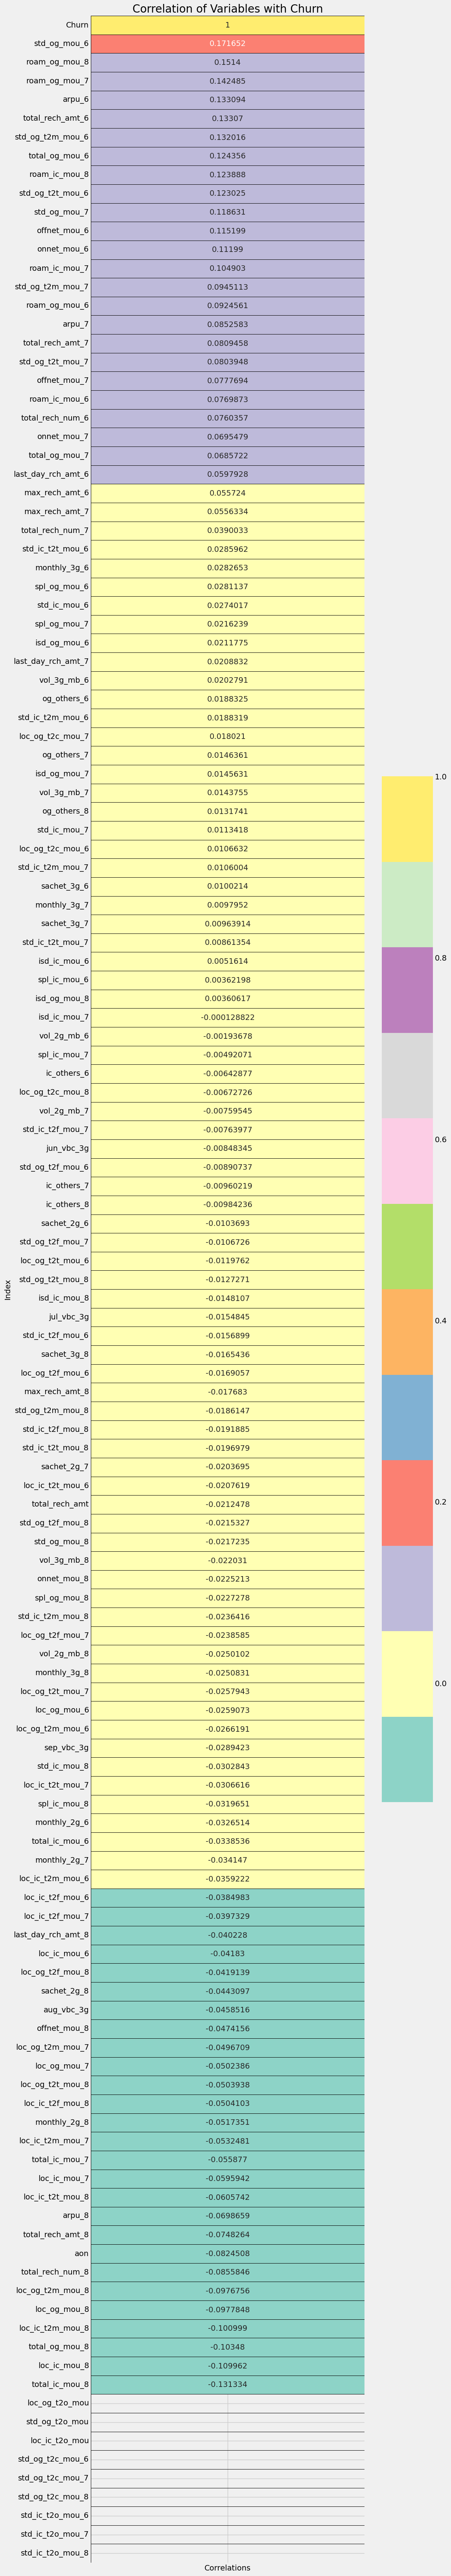

In [53]:
corr = df_HVC_trim_final_minmax.corrwith(df_HVC_trim_final_minmax['Churn']).reset_index()

corr.columns = ['Index','Correlations']
corr = corr.set_index('Index')
corr = corr.sort_values(by=['Correlations'], ascending = False)

plt.figure(figsize=(10, 80))
fig = sns.heatmap(corr, annot=True, fmt="g", cmap='Set3', linewidths=0.4, linecolor='black')

plt.title("Correlation of Variables with Churn", fontsize=20)
plt.show()





### Features having Positive correlation with Target variable

In [54]:
list(corr[corr['Correlations']>0.05].reset_index().rename(columns={'Index':'columns'})['columns'])

['Churn',
 'std_og_mou_6',
 'roam_og_mou_8',
 'roam_og_mou_7',
 'arpu_6',
 'total_rech_amt_6',
 'std_og_t2m_mou_6',
 'total_og_mou_6',
 'roam_ic_mou_8',
 'std_og_t2t_mou_6',
 'std_og_mou_7',
 'offnet_mou_6',
 'onnet_mou_6',
 'roam_ic_mou_7',
 'std_og_t2m_mou_7',
 'roam_og_mou_6',
 'arpu_7',
 'total_rech_amt_7',
 'std_og_t2t_mou_7',
 'offnet_mou_7',
 'roam_ic_mou_6',
 'total_rech_num_6',
 'onnet_mou_7',
 'total_og_mou_7',
 'last_day_rch_amt_6',
 'max_rech_amt_6',
 'max_rech_amt_7']

### Features having Negative correlation with Target variable

In [55]:
list(corr[corr['Correlations']<-0.15].reset_index().rename(columns={'Index':'columns'})['columns'])

[]

### 3.5 Imputing missing values with KNN

In [56]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# Creating  KNNImputer function

knn=KNNImputer(n_neighbors=3)

# Imputing the NaN values using KNN Imputer

df_knn = pd.DataFrame(knn.fit_transform(df_HVC_trim_final_minmax))
df_knn.columns=df_HVC_trim_final_minmax.columns

In [57]:
df_knn.isna().sum()/len(df_knn)*100

loc_og_t2o_mou    0.0
std_og_t2o_mou    0.0
loc_ic_t2o_mou    0.0
arpu_6            0.0
arpu_7            0.0
                 ... 
jul_vbc_3g        0.0
jun_vbc_3g        0.0
sep_vbc_3g        0.0
total_rech_amt    0.0
Churn             0.0
Length: 136, dtype: float64

# 5. Modeling

## 5.1 Train & Test Split

In [58]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(df_knn, train_size = 0.7, test_size = 0.3, random_state = 100)

In [59]:
y_train = df_train.pop('Churn')
X_train = df_train

In [60]:
X_train.shape

(21010, 135)

In [61]:
y_test = df_test.pop('Churn')
X_test = df_test
X_test.shape

(9005, 135)

## 5.2 Importing RFE and LinearRegression

In [62]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [63]:
X_train.max()

loc_og_t2o_mou    0.0
std_og_t2o_mou    0.0
loc_ic_t2o_mou    0.0
arpu_6            1.0
arpu_7            1.0
                 ... 
aug_vbc_3g        1.0
jul_vbc_3g        1.0
jun_vbc_3g        1.0
sep_vbc_3g        1.0
total_rech_amt    1.0
Length: 135, dtype: float64

In [64]:
# Running RFE with the output number of the variable equal to 20
lm = LogisticRegression()
lm.fit(X_train, y_train)

LogisticRegression()

In [65]:
rfe = RFE(estimator=lm, n_features_to_select=20)             # running RFE
rfe = rfe.fit(X_train, y_train)


In [66]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('loc_og_t2o_mou', False, 116),
 ('std_og_t2o_mou', False, 115),
 ('loc_ic_t2o_mou', False, 114),
 ('arpu_6', False, 13),
 ('arpu_7', False, 37),
 ('arpu_8', False, 15),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_7', False, 18),
 ('onnet_mou_8', False, 3),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', False, 8),
 ('offnet_mou_8', False, 2),
 ('roam_ic_mou_6', False, 5),
 ('roam_ic_mou_7', True, 1),
 ('roam_ic_mou_8', False, 14),
 ('roam_og_mou_6', False, 32),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 75),
 ('loc_og_t2t_mou_7', False, 101),
 ('loc_og_t2t_mou_8', False, 28),
 ('loc_og_t2m_mou_6', False, 81),
 ('loc_og_t2m_mou_7', False, 107),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 92),
 ('loc_og_t2f_mou_7', False, 78),
 ('loc_og_t2f_mou_8', False, 49),
 ('loc_og_t2c_mou_6', False, 67),
 ('loc_og_t2c_mou_7', False, 66),
 ('loc_og_t2c_mou_8', False, 65),
 ('loc_og_mou_6', False, 61),
 ('loc_og_mou_7', False, 106),
 ('loc_og_m

In [67]:
col = X_train.columns[rfe.support_]
col

Index(['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_7', 'roam_og_mou_7',
       'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_mou_7',
       'std_og_mou_8', 'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8',
       'total_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'max_rech_amt_7', 'last_day_rch_amt_6',
       'aug_vbc_3g', 'total_rech_amt'],
      dtype='object')

In [68]:
X_train.columns[~rfe.support_]

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_7',
       'offnet_mou_8',
       ...
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aon', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=115)

In [69]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [70]:
# Adding a constant variable 
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [71]:
lm = sm.Logit(y_train,X_train_rfe).fit()   # Running the linear model

Optimization terminated successfully.
         Current function value: 0.133697
         Iterations 10


In [72]:
#Let's see the summary of our linear model
print(lm.summary())

                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                21010
Model:                          Logit   Df Residuals:                    20989
Method:                           MLE   Df Model:                           20
Date:                Sat, 25 Nov 2023   Pseudo R-squ.:                  0.3239
Time:                        01:06:29   Log-Likelihood:                -2809.0
converged:                       True   LL-Null:                       -4154.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.1872      0.127    -32.998      0.000      -4.436      -3.938
onnet_mou_6           -0.9442      0.675     -1.399      0.162      -2.267       0.379
offnet_mou_6        

In [73]:
X_test = sm.add_constant(X_test)

X_test_rfe = X_test[X_train_rfe.columns]
X_test_rfe = sm.add_constant(X_test_rfe)

y_predict = lm.predict(X_test_rfe)

### Lets find the Threshold value to derive Customer Churn

In [74]:
p, r, thresholds = precision_recall_curve(y_test, y_predict)

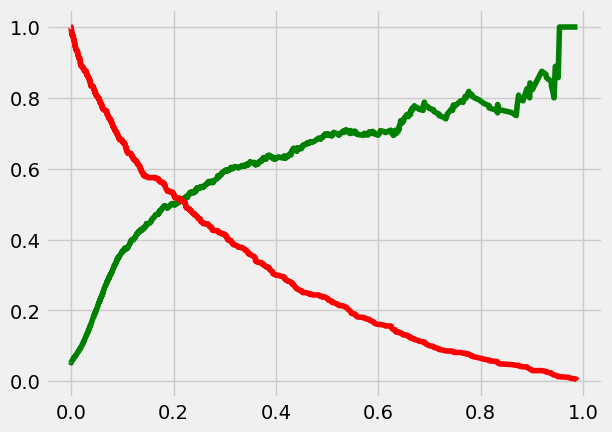

In [75]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [76]:
y_predict_cutt_off= y_predict.map(lambda x: 1 if x > 0.2 else 0)

In [77]:
df_test_pred = pd.DataFrame({'Churn':y_test,'Churn_Predicted':y_predict_cutt_off,'Predict_Probability':y_predict})

In [78]:
df_test_pred.head(20)

Churn  Churn_Predicted  Predict_Probability
16986    0.0                0             0.053317
25150    0.0                0             0.026869
6311     0.0                0             0.015433
27403    0.0                0             0.030183
591      0.0                0             0.114843
14468    0.0                0             0.103188
12016    0.0                0             0.036910
11768    0.0                0             0.013246
26916    0.0                0             0.026340
18917    0.0                0             0.001376
29283    0.0                0             0.021000
5529     0.0                0             0.013542
4977     0.0                0             0.003857
28792    0.0                0             0.005335
7091     1.0                0             0.037544
14774    0.0                0             0.017551
8118     0.0                0             0.003436
11681    0.0                0             0.005689
11442    0.0                0             0.005672
9251     0.0                0             0.008347

In [79]:
# Creating a utility function to plot correlation matrix and roc_auc_curve

def show_metrics(model, y_test, y_pred,original_Xtest):
    fig = plt.figure(figsize=(20, 8))


    
    auc_roc = roc_auc_score(y_test, model.predict(original_Xtest))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict(original_Xtest))

    plt.plot(fpr, tpr, color='darkturquoise', lw=2, marker='o', label='Trained Model (area = {0:0.3f})'.format(auc_roc))
    plt.plot([0, 1], [0, 1], color='deeppink', lw=2, linestyle='--', label= 'No Skill (area = 0.500)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.title('Receiver operating characteristic', fontsize=20)
    plt.legend(loc="lower right")
    plt.show()

### 5.2.1 Model Validation

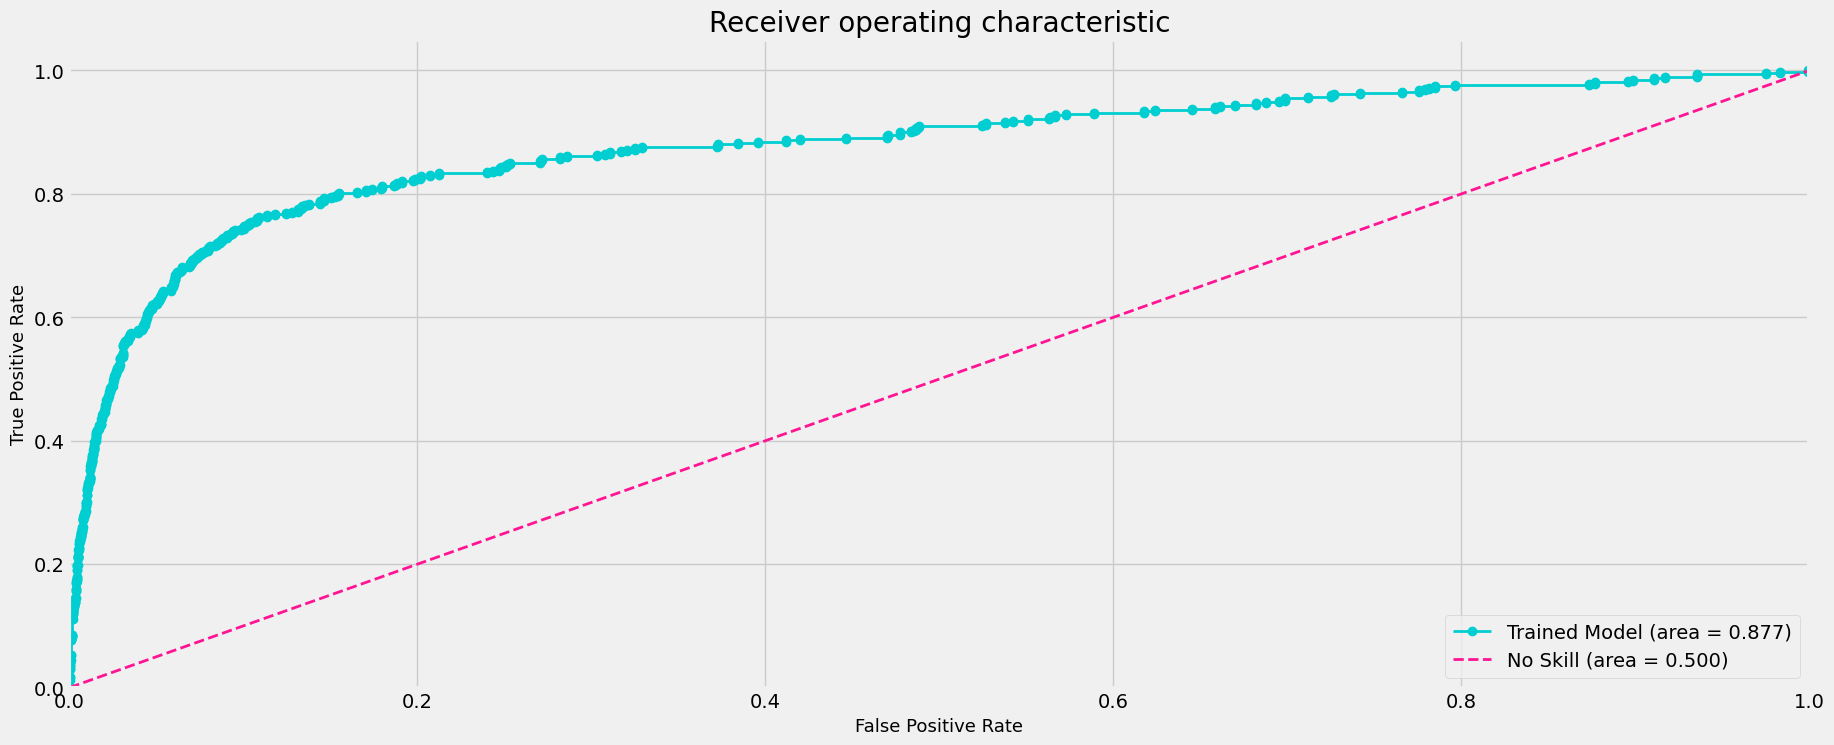

In [80]:
# plot ROC curve
show_metrics(lm, df_test_pred.Churn, df_test_pred.Churn_Predicted,X_test_rfe)

In [81]:
# Let's check the overall accuracy.
metrics.accuracy_score(df_test_pred.Churn, df_test_pred.Churn_Predicted)

0.9481399222654081

In [82]:
confusion2 = metrics.confusion_matrix(df_test_pred.Churn, df_test_pred.Churn_Predicted )
confusion2

array([[8290,  247],
       [ 220,  248]])

In [83]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [84]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5299145299145299

In [85]:
# Let us calculate specificity
TN / float(TN+FP)

0.9710671195970482

&#9658; **Logistic regression did really well on the Churn class giving almost 94.8% accuracy and algo does well on the fraud class, Snesitivity of 53% and Specificity of 97%**

## Handling Data Imbalancing Issue

Here we'll use SMOTE technique to handle Imbalance Issue


In [86]:
!pip install -q imblearn

In [144]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=50)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [145]:
print( X_train_sm.shape)
print( y_train_sm.shape)

(39930, 135)
(39930,)


## 5.3 Logistic Regression after SMOTE Technique implementation

In [146]:
lm1 = LogisticRegression()
lm1.fit(X_train_sm, y_train_sm)

LogisticRegression()

In [147]:
rfe1 = RFE(estimator=lm1, n_features_to_select=20)            # running RFE
rfe1 = rfe1.fit(X_train_sm, y_train_sm)

In [148]:
list(zip(X_train_sm.columns,rfe.support_,rfe.ranking_))

[('loc_og_t2o_mou', False, 116),
 ('std_og_t2o_mou', False, 115),
 ('loc_ic_t2o_mou', False, 114),
 ('arpu_6', False, 13),
 ('arpu_7', False, 37),
 ('arpu_8', False, 15),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_7', False, 18),
 ('onnet_mou_8', False, 3),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', False, 8),
 ('offnet_mou_8', False, 2),
 ('roam_ic_mou_6', False, 5),
 ('roam_ic_mou_7', True, 1),
 ('roam_ic_mou_8', False, 14),
 ('roam_og_mou_6', False, 32),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 75),
 ('loc_og_t2t_mou_7', False, 101),
 ('loc_og_t2t_mou_8', False, 28),
 ('loc_og_t2m_mou_6', False, 81),
 ('loc_og_t2m_mou_7', False, 107),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 92),
 ('loc_og_t2f_mou_7', False, 78),
 ('loc_og_t2f_mou_8', False, 49),
 ('loc_og_t2c_mou_6', False, 67),
 ('loc_og_t2c_mou_7', False, 66),
 ('loc_og_t2c_mou_8', False, 65),
 ('loc_og_mou_6', False, 61),
 ('loc_og_mou_7', False, 106),
 ('loc_og_m

In [149]:
col1 = X_train_sm.columns[rfe.support_]
col1

Index(['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_7', 'roam_og_mou_7',
       'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_mou_7',
       'std_og_mou_8', 'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8',
       'total_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'max_rech_amt_7', 'last_day_rch_amt_6',
       'aug_vbc_3g', 'total_rech_amt'],
      dtype='object')

In [150]:
X_train_sm.columns[~rfe.support_]
X_train_rfe_sm = X_train_sm[col1]

In [151]:
import statsmodels.api as stm
X_train_rfe_stm = stm.add_constant(X_train_rfe_sm)

In [152]:
lm1 = stm.Logit(y_train_sm,X_train_rfe_stm).fit()   # Running the linear model

Optimization terminated successfully.
         Current function value: 0.392167
         Iterations 8


In [129]:
#Let's see the summary of our linear model
print(lm1.summary())

                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                39930
Model:                          Logit   Df Residuals:                    39909
Method:                           MLE   Df Model:                           20
Date:                Sat, 25 Nov 2023   Pseudo R-squ.:                  0.4342
Time:                        01:49:11   Log-Likelihood:                -15659.
converged:                       True   LL-Null:                       -27677.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.4649      0.058    -42.212      0.000      -2.579      -2.350
onnet_mou_6           -3.5735      0.343    -10.406      0.000      -4.247      -2.900
offnet_mou_6        

In [153]:
X_test = stm.add_constant(X_test)

In [154]:
X_test_rfe = X_test[X_train_rfe.columns]
X_test_rfe = stm.add_constant(X_test_rfe)

In [155]:
y_predict = lm1.predict(X_test_rfe)

### Lets find the Threshold Again to derive Churn from Predicted Probabilities 

In [156]:
p, r, thresholds = precision_recall_curve(y_test, y_predict)

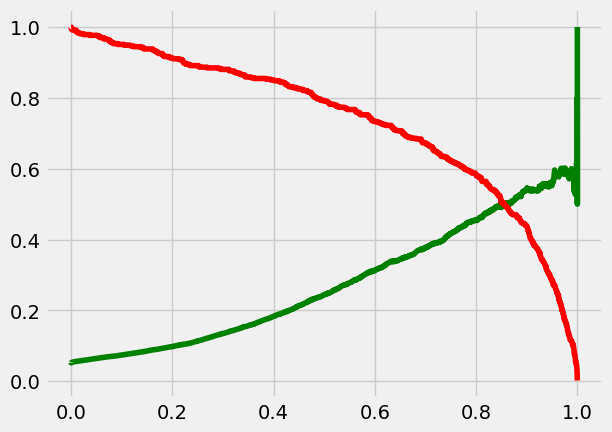

In [157]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [158]:
y_predict_cutt_off= y_predict.map(lambda x: 1 if x > 0.8 else 0)

In [159]:
df_test_pred = pd.DataFrame({'Churn':y_test,'Churn_Predicted':y_predict_cutt_off,'Predict_Probability':y_predict})

### 5.3.1 Model Evaluation

In [160]:
# Let's check the overall accuracy.
metrics.accuracy_score(df_test_pred.Churn, df_test_pred.Churn_Predicted)

0.9418101054969461

In [161]:
confusion2 = metrics.confusion_matrix(df_test_pred.Churn, df_test_pred.Churn_Predicted )
confusion2

array([[8209,  328],
       [ 196,  272]])

In [162]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [163]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5811965811965812

In [164]:
# Let us calculate specificity
TN / float(TN+FP)

0.961579009019562

### Data Prep with Stratifiled Cross Validation with SMOTE

In [175]:
   X = X_train_sm.reset_index()
X.drop(columns=['index'],inplace=True)
Y= pd.DataFrame({'Churn':y_train_sm})

In [176]:
# creating instance of statrifiedkfold split for 5 splits 
strat = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# splitting the data
for train_index, test_index in strat.split(X, Y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = Y.iloc[train_index], Y.iloc[test_index]

Train: [ 4196  4197  4198 ... 39927 39928 39929] Test: [    0     1     2 ... 23955 23956 23957]
Train: [    0     1     2 ... 39927 39928 39929] Test: [ 4196  4197  4198 ... 27948 27949 27950]
Train: [    0     1     2 ... 39927 39928 39929] Test: [ 8400  8402  8403 ... 31941 31942 31943]
Train: [    0     1     2 ... 39927 39928 39929] Test: [12616 12617 12618 ... 35934 35935 35936]
Train: [    0     1     2 ... 35934 35935 35936] Test: [16810 16811 16813 ... 39927 39928 39929]


In [177]:
# Turning the splits into an array

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

### 5.3 SMOTE + HYPERPARAM TUNING
**► We will finally apply models and classify whether a certain transaction done a particular time is fraud or geniune. Thus, this is a binary classification problem.**

► **Important thing to note here is that we did SMOTE but we won't use that data, Why?**

**If we used that data to predict the classes then it will result in a problem know as 'Data Leakage' which is another term for using test data for prediction or cross validation. So, this sounds like a good point to use Pipelines. Pipelines make our life easier by specifying what order should the operations be done on the data.**

**► One thing we should keep in mind that we might get very high accuracy but we should focus on optimising out f1_score and recall as we want to perform better on fraud cases as they are the most important.**

In [178]:
# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# specifying the parameter grid for logistic regression
log_reg_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Applying RandomsearchCV to find best model
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)

# iterating over all the splits
for train, test in strat.split(original_Xtrain, original_ytrain):
    
    # create pipeline with smote and the model 
    # sampling_strategy = minority because we want to only resample the minority class
    pipeline = make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg)
    
    # fit the pipeline
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    # finding mean for all the necessary measures to evaluate performance
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))

print(rand_log_reg.best_estimator_)
print("Accuracy: {0:0.2f}%".format(np.mean(accuracy_lst)*100))
print("Precision: {0:0.2f}".format(np.mean(precision_lst)))
print("Recall: {0:0.2f}".format(np.mean(recall_lst)))
print("f1 Score: {0:0.2f}".format(np.mean(f1_lst)))

LogisticRegression(C=1000)
Accuracy: 87.67%
Precision: 0.88
Recall: 0.88
f1 Score: 0.88


## 5.4 Random Forest Classifier

&#9658; **Now, let's try something which can take account of complex realationships. There are many such models but Random forest is bit better as it is a ensemble model and focuses on reducing variance i.e overfitting without much effecting the bias which is all we want. Also, this algorithm works in time complexity, O(d.n.log(n)) where d is the number of features.**

&#9658; **we have shown the best parameters after GridsearchCV and not the whole process itself as it is very time consuming and takes forever so you can try it yourself.**

In [179]:
# Random forest Classifier
rf_cfl = RandomForestClassifier(n_estimators = 200, 
                                 max_features = 3, 
                                 min_samples_leaf = 1, 
                                 min_samples_split = 2, 
                                 n_jobs = -1,
                                random_state = 42)

rf_cfl.fit(original_Xtrain, original_ytrain)
y_pred = rf_cfl.predict(original_Xtest)

In [215]:

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model on the training data (without constant)
rf_classifier.fit(X_train_sm, y_train_sm)

# Predictions on the test set
y_predict_rf = rf_classifier.predict(X_test.drop('const', axis=1))

# Evaluate the Random Forest model
accuracy_rf = metrics.accuracy_score(y_test, y_predict_rf)
confusion_rf = metrics.confusion_matrix(y_test, y_predict_rf)
sensitivity_rf = confusion_rf[1, 1] / float(confusion_rf[1, 1] + confusion_rf[1, 0])
specificity_rf = confusion_rf[0, 0] / float(confusion_rf[0, 0] + confusion_rf[0, 1])

# Display the evaluation metrics
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest Sensitivity: {sensitivity_rf}")
print(f"Random Forest Specificity: {specificity_rf}")


Random Forest Accuracy: 0.9446973903387007
Random Forest Sensitivity: 0.5662393162393162
Random Forest Specificity: 0.9654445355511304


### 5.4.1 Model metrics

In [205]:
confusion4 = metrics.confusion_matrix(original_ytest, y_pred )
confusion4

array([[3864,  129],
       [  42, 3951]])

In [206]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [207]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9894815927873779

In [208]:
# Let us calculate specificity
TN / float(TN+FP)

0.9676934635612322

In [209]:
print('Accuracy :{0:0.5f}'.format(accuracy_score(y_pred , original_ytest)*100 ))
print('AUC : {0:0.5f}'.format(roc_auc_score(original_ytest , y_pred)))
print('Precision : {0:0.5f}'.format(precision_score(original_ytest , y_pred)))
print('Recall : {0:0.5f}'.format(recall_score(original_ytest , y_pred)))
print('F1 : {0:0.5f}'.format(f1_score(original_ytest , y_pred)))

Accuracy :97.85875
AUC : 0.97859
Precision : 0.96838
Recall : 0.98948
F1 : 0.97882


SMOTE + HYPERPARAM TUNING ---- without hyper tuning 

Accuracy :0.95891

AUC : 0.64812

Precision : 0.76630

Recall : 0.30128

F1 : 0.43252

&#9658; **Using Random Forest classifier we got 97% accuracy with Sensitivity , Precision is the best models, it is performing better for Churn classification data**

# 6. Feature Importance

Text(0.5, 0, 'Random Forest Feature Importance')

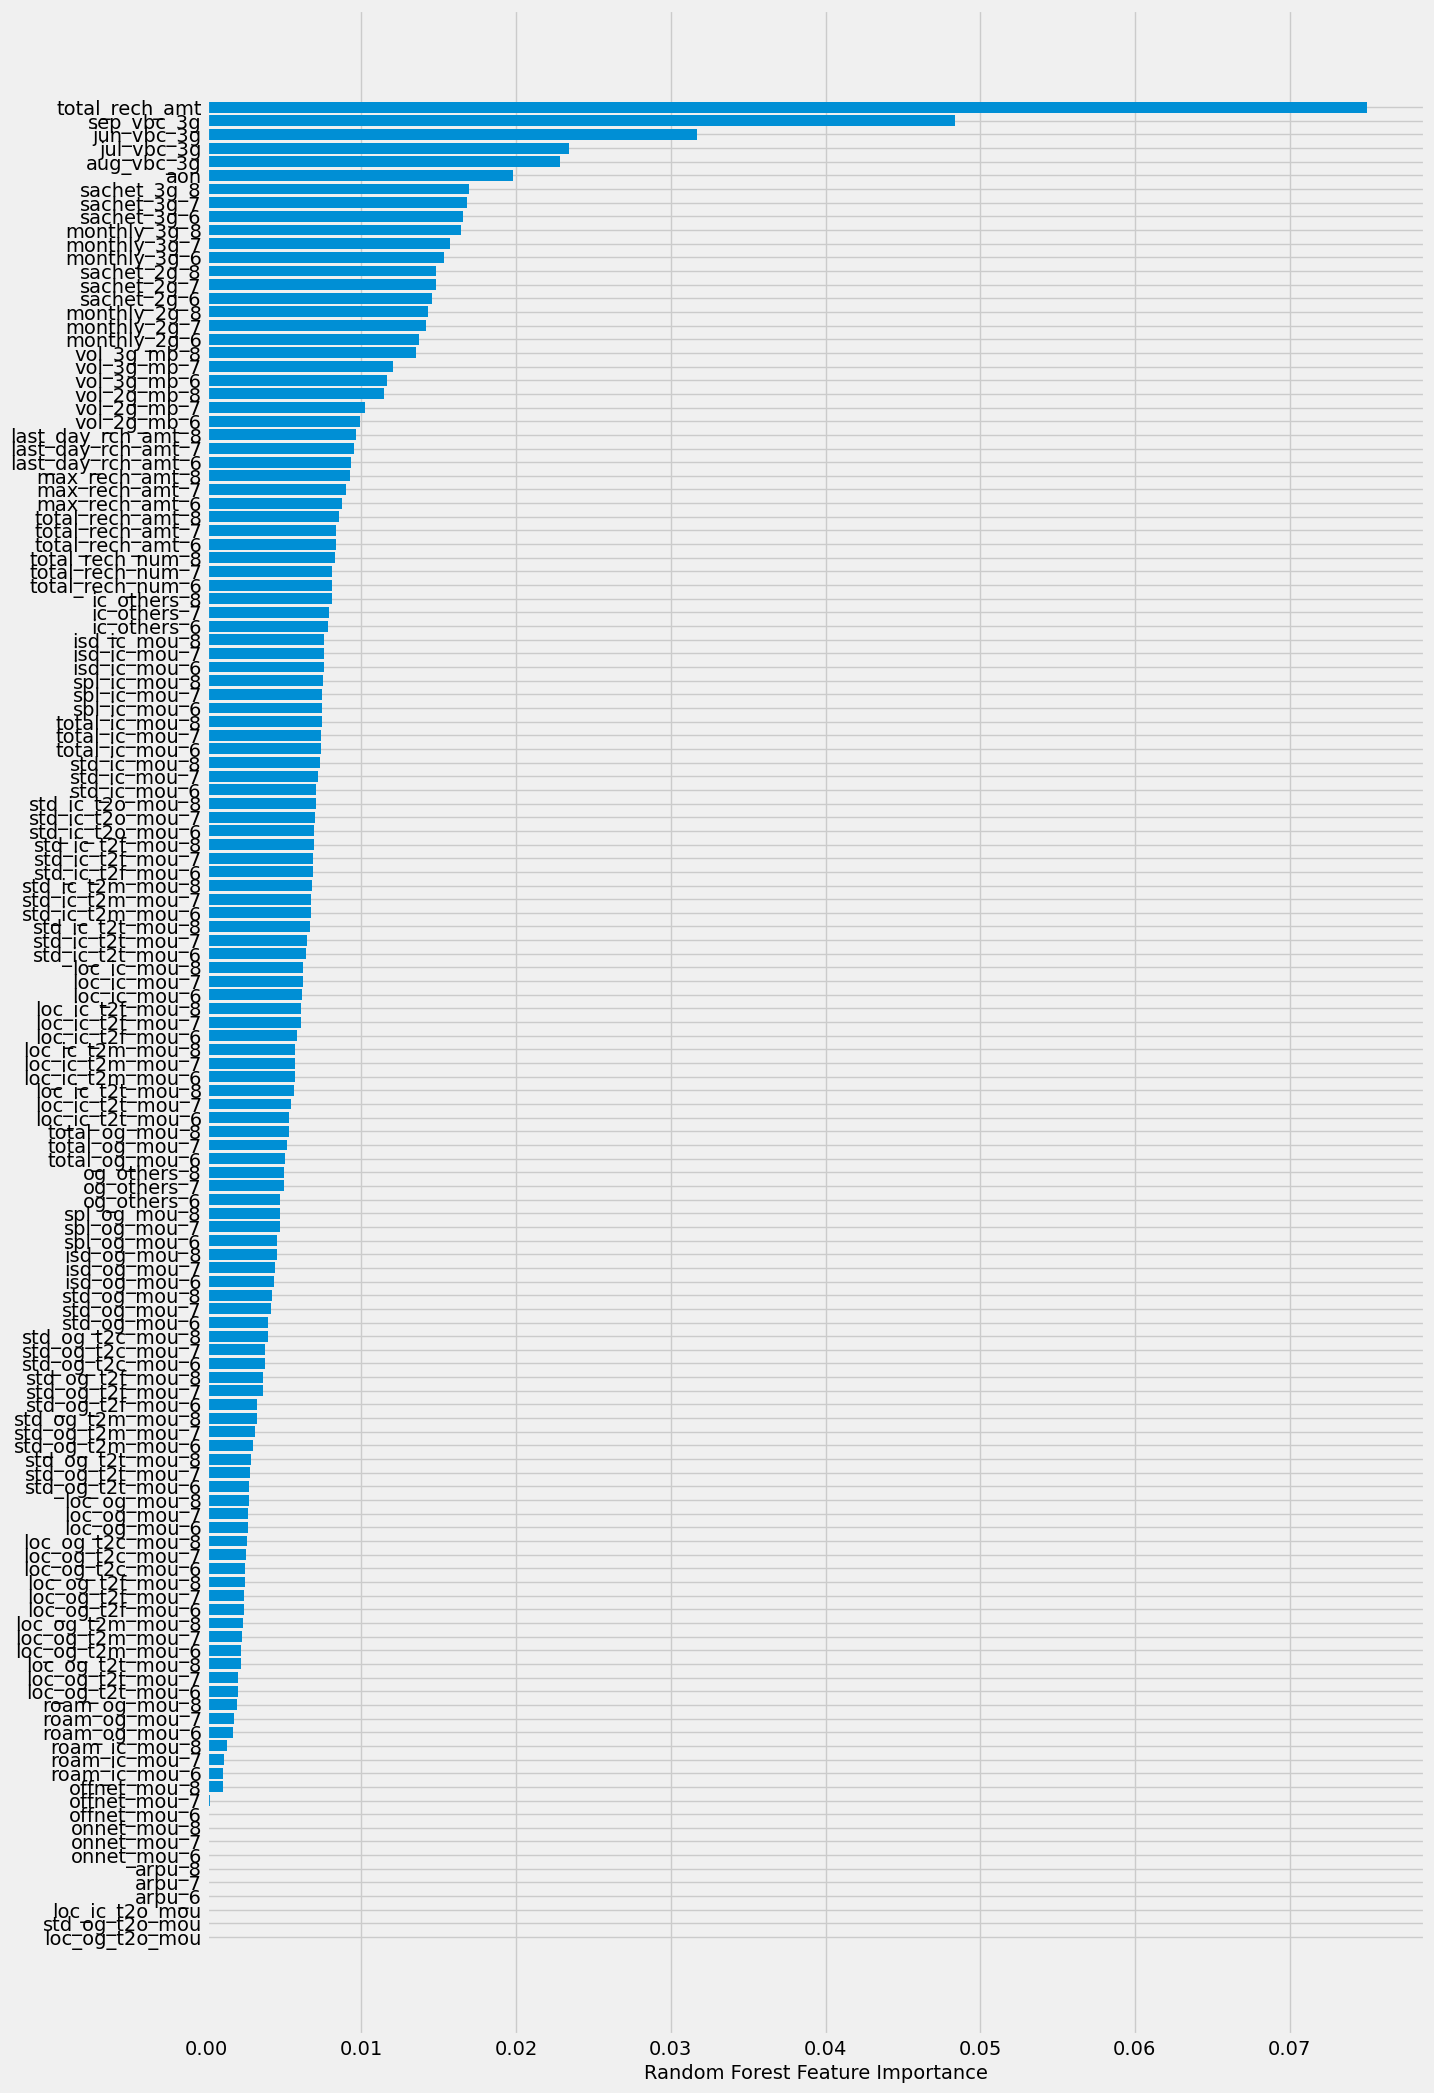

In [216]:
sorted_idx = rf_cfl.feature_importances_.argsort()
plt.figure(figsize=(14,25))
plt.barh(X.iloc[sorted_idx].columns.to_list(), rf_cfl.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## 6.1 Top 10 features Contributing to Churn

In [217]:
df_feature_impt = pd.DataFrame({'Features':X.iloc[sorted_idx].columns.to_list(),'Importance_Score':rf_cfl.feature_importances_[sorted_idx]})

In [218]:
df_feature_impt.sort_values(by='Importance_Score',ascending=False).head(10)

Features  Importance_Score
134  total_rech_amt          0.074987
133      sep_vbc_3g          0.048350
132      jun_vbc_3g          0.031680
131      jul_vbc_3g          0.023426
130      aug_vbc_3g          0.022854
129             aon          0.019800
128     sachet_3g_8          0.016970
127     sachet_3g_7          0.016821
126     sachet_3g_6          0.016571
125    monthly_3g_8          0.016414

# Conclusion


## Best model are mentioned below 

> Random Forest

## Features Contributes to Customer Churn :-  

* total_rech_amt
* Volume Based Cost(VBC) - 3G - Jun,July,Augest & September 
* AON - Age on network - number of days the customer is using the operator T network
* sachet_3g (Jun,July & Augest) Service schemes with validity smaller than a month 
* Monthly 3G - August 

## Recommendation to Business :- 

> Total Recharge Amount is important factor, Total Recharge Amount is less then probability of Churn is more 

> Volume Based Cost(VBC) - 3G - Jun,July,Augest & September is less then probability of Churn is more

> sachet_3g , If Customer uses smaller tenutre ( ex 10 days or 15 days ) ex- Tourist or Business travelers might belong to this catagory

> Monthly 3G - August which is the Action phase of churm 


